# Review of Sentiment Analysis Models

The purpose of this review is to provide a broad but moderately deep understanding of different types of sentiment analysis models and their respective pros and cons. We will be exploring 3 different types of datasets and analysed them through different sentiment analysis models, which include:

## 1. Traditional models

a. TextBlob
    
b. VADER
    
c. Logistic Regression

d. Naive Bayes 

e. Support Vector Machine (SVM)
   
    
## 2. Deep learning models

a. ULMFit

b. BERT


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Reading and Filtering Data


### 1. Twitter dataset

This dataset includes 1,600,000 tweets with emoticons pre-removed. The dataset was collected using the Twitter API. Source: https://www.kaggle.com/kazanova/sentiment140

In [0]:
tweet_df = pd.read_csv('/content/gdrive/My Drive/Dataset/twitter_train.csv',
                       encoding='iso-8859-1',
                       header=None)
tweet_df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [0]:
tweet_df.columns = ['polarity', 'tweet ID', 'date', 'query', 'username', 'text']
tweet_df = tweet_df.replace({'polarity':{0:'neg',4:'pos'}})
tweet_df = tweet_df.filter(['text','polarity'])
tweet_df_head = tweet_df.head(100000)
tweet_df_tail = tweet_df.tail(100000)
tweet_df = pd.concat([tweet_df_head, tweet_df_tail])
tweet_df

,text,polarity
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",neg
1,is upset that he can't update his Facebook by ...,neg
2,@Kenichan I dived many times for the ball. Man...,neg
3,my whole body feels itchy and like its on fire,neg
4,"@nationwideclass no, it's not behaving at all....",neg
...,...,...
1599995,Just woke up. Having no school is the best fee...,pos
1599996,TheWDB.com - Very cool to hear old Walt interv...,pos
1599997,Are you ready for your MoJo Makeover? Ask me f...,pos
1599998,Happy 38th Birthday to my boo of alll time!!! ...,pos


<BarContainer object of 2 artists>

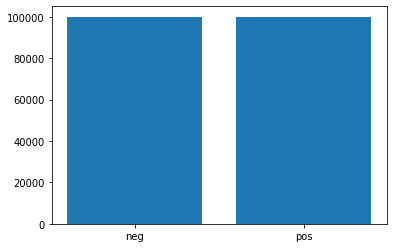

In [0]:
plt.bar(tweet_df['polarity'].unique(),tweet_df['polarity'].value_counts())

### 2. IMDB movie review dataset
This dataset has 100,000 movie reviews which are being labelled as positive or negative review. Source: https://www.kaggle.com/utathya/imdb-review-dataset

In [0]:
imdb_df = pd.read_csv('/content/gdrive/My Drive/Dataset/imdb.csv', 
                      encoding='iso-8859-1')
imdb_df

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
...,...,...,...,...,...
99995,99995,train,"Delightfully awful! Made by David Giancola, a ...",unsup,9998_0.txt
99996,99996,train,"Watching Time Chasers, it obvious that it was ...",unsup,9999_0.txt
99997,99997,train,At the beginning we can see members of Troma t...,unsup,999_0.txt
99998,99998,train,"The movie was incredible, ever since I saw it ...",unsup,99_0.txt


In [0]:
imdb_df = imdb_df[(imdb_df['type'] == 'train') & (imdb_df['label'] != 'unsup')]
imdb_df = imdb_df.filter(['review','label'])
imdb_df

,review,label
25000,Story of a man who has unnatural feelings for ...,neg
25001,Airport '77 starts as a brand new luxury 747 p...,neg
25002,This film lacked something I couldn't put my f...,neg
25003,"Sorry everyone,,, I know this is supposed to b...",neg
25004,When I was little my parents took me along to ...,neg
...,...,...
49995,"Seeing as the vote average was pretty low, and...",pos
49996,"The plot had some wretched, unbelievable twist...",pos
49997,I am amazed at how this movie(and most others ...,pos
49998,A Christmas Together actually came before my t...,pos


<BarContainer object of 2 artists>

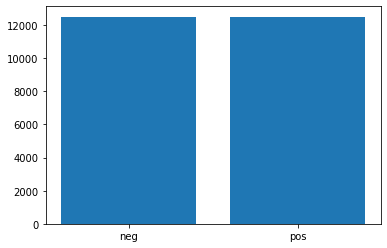

In [0]:
plt.bar(imdb_df['label'].unique(),imdb_df['label'].value_counts())

### 3. Amazon's Products review dataset

This is a list of over 160,000 consumer reviews for Amazon products like the Kindle, Fire TV Stick, and more provided by Datafiniti's Product Database. The dataset includes basic product information, rating and review text. Source: https://www.kaggle.com/harshaiitj08/amazon-product-ratings


In [0]:
amz_df = pd.read_csv('/content/gdrive/My Drive/Dataset/amazon.csv')
amz_df

,Unnamed: 0,reviews,ratings
0,0,I like the item pricing. My granddaughter want...,5.0
1,1,Love the magnet easel... great for moving to d...,4.0
2,2,Both sides are magnetic. A real plus when you...,5.0
3,3,Bought one a few years ago for my daughter and...,5.0
4,4,I have a stainless steel refrigerator therefor...,4.0
...,...,...,...
167592,167592,This drone is very fun and super duarable. Its...,5.0
167593,167593,This is my brother's most prized toy. It's ext...,5.0
167594,167594,This Panther Drone toy is awesome. I definitel...,5.0
167595,167595,This is my first drone and it has proven to be...,5.0


In [0]:
amz_df = amz_df.dropna()
amz1_df = amz_df.query("ratings == 1").head(4500)
amz2_df = amz_df.query("ratings == 2").head(4500)
amz3_df = amz_df.query("ratings == 3").head(4500)
amz4_df = amz_df.query("ratings == 4").head(4500)
amz5_df = amz_df.query("ratings == 5").head(4500)
amz_df = pd.concat([amz1_df, amz2_df, amz3_df, amz4_df, amz5_df])
amz_df = amz_df.filter(['reviews','ratings'])
amz_df

,reviews,ratings
157,A crappy cardboard ghost of the original. Har...,1.0
165,We have this same game but it was made in 1967...,1.0
186,Hated this product.Predictable. Not fun. It ...,1.0
191,"I had high hopes for this game, as I am a big ...",1.0
298,thought this was a book with pages to illustra...,1.0
...,...,...
6884,My 3 & 4 y/o love this puzzle. There is enoug...,5.0
6887,my 4 year old got this last year and still lov...,5.0
6888,This puzzle is very well made. The pieces are...,5.0
6889,We love the Melissa and Doug line. We have abo...,5.0


<BarContainer object of 5 artists>

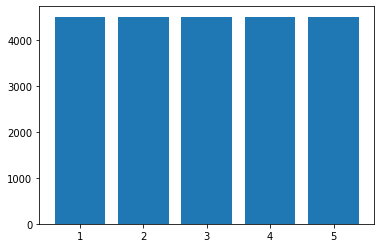

In [0]:
plt.bar(amz_df['ratings'].unique(),amz_df['ratings'].value_counts())

### 4. SST2 Dataset

In [0]:
sst_df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', 
                      delimiter='\t', header=None)
sst_df.columns=['review','label']
sst_df

,review,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


<BarContainer object of 2 artists>

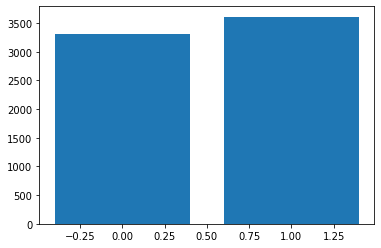

In [0]:
plt.bar(sst_df['label'].unique(),sst_df['label'].value_counts())

# Cleaning and Pre-processing Data 


## 1) Remove punctuation, number & lowercase the text


### 1. Twitter dataset

In [0]:
def clean(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_df['text'] = tweet_df['text'].apply(lambda x: clean(x))
tweet_df.head(20)

,text,polarity
0,switchfoot httptwitpiccomyzl awww thats a bum...,neg
1,is upset that he cant update his facebook by t...,neg
2,kenichan i dived many times for the ball manag...,neg
3,my whole body feels itchy and like its on fire,neg
4,nationwideclass no its not behaving at all im ...,neg
5,kwesidei not the whole crew,neg
6,need a hug,neg
7,loltrish hey long time no see yes rains a bit...,neg
8,tatianak nope they didnt have it,neg
9,twittera que me muera,neg


### 2. IMDB movie review dataset

In [0]:
def clean(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

imdb_df['review'] = imdb_df['review'].apply(lambda x: clean(x))
imdb_df.head(20)

,review,label
25000,story of a man who has unnatural feelings for ...,neg
25001,airport starts as a brand new luxury plane i...,neg
25002,this film lacked something i couldnt put my fi...,neg
25003,sorry everyone i know this is supposed to be a...,neg
25004,when i was little my parents took me along to ...,neg
25005,it appears that many critics find the idea of ...,neg
25006,the second attempt by a new york intellectual ...,neg
25007,i dont know who to blame the timid writers or ...,neg
25008,this film is mediocre at best angie harmon is ...,neg
25009,the film is bad there is no other way to say i...,neg


### 3. Amazon's Product review dataset

In [0]:
def clean(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

amz_df['reviews'] = amz_df['reviews'].apply(lambda x: clean(x))
amz_df.head(20)

,reviews,ratings
157,a crappy cardboard ghost of the original hard...,1.0
165,we have this same game but it was made in we ...,1.0
186,hated this productpredictable not fun it att...,1.0
191,i had high hopes for this game as i am a big f...,1.0
298,thought this was a book with pages to illustra...,1.0
330,started out as a great road trip activity for ...,1.0
534,it didnt work when we bought it a bummer becau...,1.0
586,heres a creepy little elf and a book if you w...,1.0
730,this game looked like fun but after trying it ...,1.0
742,it took forever for me to write this review si...,1.0


### 4. SST2 dataset

In [0]:
def clean(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

sst_df['review'] = sst_df['review'].apply(lambda x: clean(x))
sst_df.head(20)

,review,label
0,a stirring funny and finally transporting re ...,1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo nt sit still fo...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker s bartleby should have been th...,1
5,campanella gets the tone just right funny in t...,1
6,a fan film that for the uninitiated plays bett...,0
7,b art and berling are both superb while huppe...,1
8,a little less extreme than in the past with l...,0
9,the film is strictly routine,0


## 2) Count vectorizer


The vectorizer shows the frequecy of a term t occurs in a document d. 


### 1. Twitter dataset

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2), 
                             stop_words="english", 
                             max_features=20)
vector = vectorizer.fit_transform(tweet_df["text"]).toarray()
tweet_count_vector_df = pd.DataFrame(vector, columns = vectorizer.get_feature_names())
tweet_count_vector_df

,day,dont,going,good,got,home,im,just,know,like,lol,love,new,night,really,think,time,today,want,work
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
199996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


###  2. IMDB movie review dataset

In [0]:
vectorizer = CountVectorizer(ngram_range=(1,2), 
                             stop_words="english",
                             max_features=20)
vector = vectorizer.fit_transform(imdb_df["review"]).toarray()
imdb_count_vector_df = pd.DataFrame(vector, columns = vectorizer.get_feature_names())
imdb_count_vector_df

,bad,br,br br,characters,dont,film,films,good,great,just,like,make,movie,movies,people,really,story,think,time,way
0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,0
1,1,4,0,2,1,3,3,1,3,4,2,0,0,0,0,0,0,1,4,0
2,0,2,0,0,2,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,2,0,0,0,0,3,1,1,1,1,0
4,0,0,0,2,0,5,0,0,0,4,1,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,3,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0
24996,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
24997,1,5,0,0,1,0,0,1,1,1,0,0,7,5,1,0,1,0,0,1
24998,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


### 3. Amazon's Products review dataset

In [0]:
vectorizer = CountVectorizer(ngram_range=(1,2), 
                             stop_words="english", 
                             max_features=20)
vector = vectorizer.fit_transform(amz_df["reviews"]).toarray()
amz_count_vector_df = pd.DataFrame(vector, columns = vectorizer.get_feature_names())
amz_count_vector_df

,daughter,dont,fun,game,good,got,great,just,kids,like,little,old,play,really,son,time,toy,use,year,year old
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,2,0,1,1,2,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,8,0,0,0,1,0,1,0,0,1,2,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22496,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,1
22497,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1
22498,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0


## 3) TF-IDF vectorizer



1. Term Frequency (TF)

  The frequency of a word **w** appears in a document divided by the total number of words in the document. Every document has its own term frequency.

  ![alt text](https://miro.medium.com/proxy/1*HM0Vcdrx2RApOyjp_ZeW_Q.png)

2. Inverse Data Frequency (IDF)

  The log of the number of documents divided by the number of documents that  contain the word **w**. IDF determines the weight of rare words across all documents in the corpus.

  ![alt text](https://miro.medium.com/proxy/1*A5YGwFpcTd0YTCdgoiHFUw.png)

  Eg: Assume we have 1000 documents and the word 'the' appears 1000 times while 'python' appears 500 times across all the documents and the IDF score will penalise the common words.
  
  idf(the) = log(1000/1000) = 0
  
  idf(python) = log(1000/500) = 0.301


---


  The TF-IDF vectorizer is simply the TF multiplied by IDF. The TF-IDF score increases with number of occurrences within a document and rarity of terms in the collection of documents.

![alt text](https://miro.medium.com/proxy/1*nSqHXwOIJ2fa_EFLTh5KYw.png)

Reference: https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76



### 1. Twitter dataset

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                             stop_words="english", 
                             max_features=20)
vector = vectorizer.fit_transform(tweet_df['text']).toarray()
tweet_tfidf_vector_df = pd.DataFrame(vector, columns = vectorizer.get_feature_names())
tweet_tfidf_vector_df

,day,dont,going,good,got,home,im,just,know,like,lol,love,new,night,really,think,time,today,want,work
0,0.671002,0.0,0.0,0.0,0.741456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199996,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199997,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199998,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 2. IMDB movie review dataset

In [0]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                             stop_words="english", 
                             max_features=20)
vector = vectorizer.fit_transform(imdb_df['review']).toarray()
imdb_tfidf_vector_df = pd.DataFrame(vector, columns = vectorizer.get_feature_names())
imdb_tfidf_vector_df

,bad,br,br br,characters,dont,film,films,good,great,just,like,make,movie,movies,people,really,story,think,time,way
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.335162,0.405050,0.316614,0.000000,0.412560,0.000000,0.000000,0.000000,0.000000,0.375876,0.429411,0.357035,0.000000
1,0.130018,0.322704,0.0,0.270551,0.125055,0.254427,0.410294,0.104034,0.377180,0.393106,0.187491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133288,0.443291,0.000000
2,0.000000,0.430096,0.0,0.000000,0.666688,0.226064,0.000000,0.000000,0.000000,0.523926,0.000000,0.000000,0.211993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.326423,0.000000,0.000000,0.000000,0.378259,0.000000,0.000000,0.000000,0.000000,0.734474,0.221856,0.224530,0.256509,0.213275,0.000000
4,0.000000,0.000000,0.0,0.394546,0.000000,0.618386,0.000000,0.000000,0.000000,0.573268,0.136709,0.186747,0.115979,0.193218,0.000000,0.000000,0.170142,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.000000,0.707811,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.367688,0.287410,0.274159,0.000000,0.232585,0.000000,0.000000,0.000000,0.000000,0.389802,0.000000,0.000000
24996,0.000000,0.634500,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.772923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24997,0.128307,0.398070,0.0,0.000000,0.123409,0.000000,0.000000,0.102664,0.124072,0.096983,0.000000,0.000000,0.549381,0.653754,0.125542,0.000000,0.115136,0.000000,0.000000,0.127580
24998,0.000000,0.000000,0.0,0.000000,0.652705,0.000000,0.000000,0.000000,0.000000,0.000000,0.489289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.578422,0.000000


### 3. Amazon's Products review dataset

In [0]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                             stop_words="english", 
                             max_features=20)
vector = vectorizer.fit_transform(amz_df['reviews']).toarray()
amz_tfidf_vector_df = pd.DataFrame(vector, columns = vectorizer.get_feature_names())
amz_tfidf_vector_df

,daughter,dont,fun,game,good,got,great,just,kids,like,little,old,play,really,son,time,toy,use,year,year old
0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.000000,0.586391,0.000000,0.00000,0.0,0.487461,0.000000,0.253213,0.283729,0.523363,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.372708,0.395595,0.000000,0.00000,0.0,0.328855,0.000000,0.683298,0.000000,0.000000,0.359934,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.948393,0.000000,0.00000,0.0,0.098549,0.000000,0.102383,0.000000,0.000000,0.107862,0.226104,0.00000,0.0,0.0,0.132661,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.648411,0.000000,0.000000,0.76129,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000
22496,0.0,0.0,0.000000,0.000000,0.000000,0.39742,0.0,0.000000,0.000000,0.000000,0.000000,0.328740,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.753432,0.407833
22497,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.423438,0.358947,0.402205,0.370951,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.425087,0.460200
22498,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.524964,0.445010,0.498640,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.527008,0.000000


# A) Traditional Models

# 1. TextBlob

TextBlob is built based on NLTK and Pattern. It has great API for all the common NLP operations. It’s great for initial prototyping in almost every NLP project. Unfortunately, it inherits the low performance from NLTK and therefore it’s not good for large scale production usage. 


Functionalities:
1. Tokenization
2. Parts Of Speech Tagging (POS) 
3. Name Entity Recognition (NER)
4. Classification 
5. Sentiment analysis

Sentiment analysis using TextBlob will result two sentiment metrics, which are: 
1. Polarity 

    lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement    
2. Subjectivity 

    lies in the range of [0,1] where 0 indicates as factual information ans 1 indicates as personal opinion

Example: 

* Towards Data Science is a great platform to learn data science.
    
    Sentiment(polarity=0.8, subjectivity=0.75)

* We can see that polarity is 0.8, which means that the statement is positive and 0.75 subjectivity refers that mostly it is a personal opinion and not a factual information. We can say it's a positive and subjective statement.

Pros:
1. easy to learn and offers a lot of features like sentiment analysis, pos-tagging, noun phrase extraction etc

2. provides language translation and detection which is powered by Google Translate

3. does not require training process to predict sentiment of text, more efficient in some extent

Cons:
1. slow in performance when dealing with huge amount of data (more than 100k)

2. does not recognise the context of data, hence the result generated are usually less accurate compared to other custom trained model (Eg: Logistic Regression, Naive Bayes etc)

For more details, kindly refer to Textblob documentation https://textblob.readthedocs.io/en/dev/

Reference: https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/) 



In [0]:
#Example for Textblob language translation
from textblob import TextBlob
TextBlob('你在做什么？').translate(from_lang='zh-CN', to ='en')

### 1. Twitter dataset

In [0]:
tweet_df['textblob_polarity'] = tweet_df.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)

i = 0
predicted_value = [ ] 
while i < len(tweet_df):
    if ((tweet_df.iloc[i]['textblob_polarity'] >= 0)):
        predicted_value.append('pos')
        i = i+1
    elif ((tweet_df.iloc[i]['textblob_polarity'] < 0)):
        predicted_value.append('neg')
        i = i+1
tweet_df['textblob_predicted'] = predicted_value

tweet_df['textblob_subjectivity'] = tweet_df.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)       
tweet_df

,text,polarity,textblob_polarity,textblob_predicted,textblob_subjectivity
0,switchfoot httptwitpiccomyzl awww thats a bum...,neg,0.2000,pos,0.4500
1,is upset that he cant update his facebook by t...,neg,0.0000,pos,0.0000
2,kenichan i dived many times for the ball manag...,neg,0.5000,pos,0.5000
3,my whole body feels itchy and like its on fire,neg,0.2000,pos,0.4000
4,nationwideclass no its not behaving at all im ...,neg,-0.6250,neg,1.0000
...,...,...,...,...,...
1599995,just woke up having no school is the best feel...,pos,1.0000,pos,0.3000
1599996,thewdbcom very cool to hear old walt intervie...,pos,0.2775,pos,0.5225
1599997,are you ready for your mojo makeover ask me fo...,pos,0.2000,pos,0.5000
1599998,happy th birthday to my boo of alll time tupac...,pos,0.8000,pos,1.0000


In [0]:
from sklearn.metrics import f1_score,accuracy_score
m1 = f1_score(tweet_df['polarity'], tweet_df['textblob_predicted'], pos_label='pos')
m2 = accuracy_score(tweet_df['polarity'], tweet_df['textblob_predicted'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.6920631466036549
Accuracy score: 0.60383


We can observe that TextBlob doesn't work well with Twitter dataset as the F1 score and accuracy score are 0.692 and 0.604 respectively, which are belowe 0.7. This shows results generated by TextBlob are less in terms of accuracy.



### 2. IMDB movie review

In [0]:
imdb_df['textblob_polarity'] = imdb_df.apply(lambda x: TextBlob(x['review']).sentiment.polarity, axis=1)

i = 0
predicted_value = [ ] 
while i < len(imdb_df):
    if ((imdb_df.iloc[i]['textblob_polarity'] >= 0)):
        predicted_value.append('pos')
        i = i+1
    elif ((imdb_df.iloc[i]['textblob_polarity'] < 0)):
        predicted_value.append('neg')
        i = i+1        
imdb_df['textblob_predicted'] = predicted_value

imdb_df['textblob_subjectivity'] = imdb_df.apply(lambda x: TextBlob(x['review']).sentiment.subjectivity, axis=1)
imdb_df

,review,label,textblob_polarity,textblob_predicted,textblob_subjectivity
25000,story of a man who has unnatural feelings for ...,neg,-0.071759,neg,0.620370
25001,airport starts as a brand new luxury plane i...,neg,0.040492,pos,0.499230
25002,this film lacked something i couldnt put my fi...,neg,0.079167,pos,0.527778
25003,sorry everyone i know this is supposed to be a...,neg,0.043542,pos,0.647083
25004,when i was little my parents took me along to ...,neg,-0.055741,neg,0.557328
...,...,...,...,...,...
49995,seeing as the vote average was pretty low and ...,pos,0.291961,pos,0.563529
49996,the plot had some wretched unbelievable twists...,pos,0.250000,pos,0.600000
49997,i am amazed at how this movieand most others h...,pos,0.136099,pos,0.645995
49998,a christmas together actually came before my t...,pos,0.118069,pos,0.461614


In [0]:
m1 = f1_score(imdb_df['label'], imdb_df['textblob_predicted'], pos_label='pos')
m2 = accuracy_score(imdb_df['label'], imdb_df['textblob_predicted'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.7515891177218408
Accuracy score: 0.68736


The performance of TextBlob in movie review dataset is slightly better than Twitter dataset as the F1 score and accuracy score are 0.752 and 0.687 respectively, which one of the measure exceeds 0.7 . Besides, we can notice that most of the reviews produce subjectivity score that exceeds 0.5, indicating they are fairly subjective statement.



### 3. Amazon's Products review dataset

In [0]:
amz_df['textblob_polarity'] = amz_df.apply(lambda x: TextBlob(x['reviews']).sentiment.polarity, axis=1)

i = 0
predicted_value = [ ] 
while i < len(amz_df):
    if ((amz_df.iloc[i]['textblob_polarity'] > 0.6)):
        predicted_value.append(5.0)
        i = i+1
    elif ((amz_df.iloc[i]['textblob_polarity'] <= 0.6 and amz_df.iloc[i]['textblob_polarity'] > 0.2)):
        predicted_value.append(4.0)
        i = i+1 
    elif ((amz_df.iloc[i]['textblob_polarity'] <= 0.2 and amz_df.iloc[i]['textblob_polarity'] > -0.2)):
        predicted_value.append(3.0)
        i = i+1
    elif ((amz_df.iloc[i]['textblob_polarity'] <= -0.2 and amz_df.iloc[i]['textblob_polarity']> -0.6)):
        predicted_value.append(2.0)
        i = i+1
    elif ((amz_df.iloc[i]['textblob_polarity'] <= -0.6)):
        predicted_value.append(1.0)
        i = i+1         
amz_df['textblob_predicted'] = predicted_value

amz_df['textblob_subjectivity'] = amz_df.apply(lambda x: TextBlob(x['reviews']).sentiment.subjectivity, axis=1)
amz_df

,reviews,ratings,textblob_polarity,textblob_predicted,textblob_subjectivity
157,a crappy cardboard ghost of the original hard...,1.0,-0.305556,2.0,0.763889
165,we have this same game but it was made in we ...,1.0,0.081389,3.0,0.415000
186,hated this productpredictable not fun it att...,1.0,-0.194792,3.0,0.463542
191,i had high hopes for this game as i am a big f...,1.0,-0.024593,3.0,0.419584
298,thought this was a book with pages to illustra...,1.0,-0.189231,3.0,0.344808
...,...,...,...,...,...
6884,my yo love this puzzle there is enough of ...,5.0,0.210000,4.0,0.566667
6887,my year old got this last year and still love...,5.0,0.204167,4.0,0.412500
6888,this puzzle is very well made the pieces are ...,5.0,0.177546,3.0,0.531812
6889,we love the melissa and doug line we have abou...,5.0,0.219123,4.0,0.506364


In [0]:
m1 = f1_score(amz_df['ratings'], amz_df['textblob_predicted'], average='macro')
m2 = accuracy_score(amz_df['ratings'], amz_df['textblob_predicted'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.15556798102787572
Accuracy score: 0.22924444444444445


In conclusion, TextBlob shines if your intention is having a quick prediction on the sentiment of documents but be awared that the accuracy is lower compared to custom trained model like Logistic Regression. 


# 2. VADER 

Widely used in analyzing sentiment on social media text because it has been specifically attuned to analyze sentiments expressed in social media (Eg: Twitter, Facebook etc)

VADER produces four sentiment metrics:
 1. positive
 2. neutral 
 3. negative 
 4. compound
 
The first three, positive, neutral and negative, represent the proportion of the text that falls into those categories. 

The compound score is a normalized score of **sum_s** and
**sum_s** is the sum of the valence score computed based on pre-defined sentiment lexicon (aka Sentiment Intensity) and
the normalized score is simply the **sum_s** divided by square root of  its square plus an alpha parameter (a hyperparameter).

> norm(sum_s) = sum_s / sqrt(sum_s*sum_s + alpha)
 

Pros
1. Among the most comprehensive tools for social media analysis 

2. Easy to use and does not require training process

Cons
1. Not accurate when dealing when longer text and complex data

2. Does not recognize context of the datasets, hence the result generated are less accurate when dealing with datasets 

Reference: 
1. https://www.kaggle.com/nikhilsable/sentiment-using-airline-tweets-using-vader

2. http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html



### 1. Twitter dataset

In [0]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()
i = 0
comp_value = []
while i < len(tweet_df):
    k = analyser.polarity_scores(tweet_df.iloc[i]['text'])
    comp_value.append(k['compound'])
    i += 1
    
comp_value = np.array(comp_value)
tweet_df['Vader_score'] = comp_value

i = 0
predicted_value = [ ] 
while i < len(tweet_df):
    if ((tweet_df.iloc[i]['Vader_score'] >= 0)):
        predicted_value.append('pos')
        i = i+1
    elif ((tweet_df.iloc[i]['Vader_score'] < 0)):
        predicted_value.append('neg')
        i = i+1
        
tweet_df['Vader_predicted'] = predicted_value
tweet_df

     |████████████████████████████████| 133kB 2.8MB/s 


,text,polarity,textblob_polarity,textblob_predicted,textblob_subjectivity,Vader_score,Vader_predicted
0,switchfoot httptwitpiccomyzl awww thats a bum...,neg,0.2000,pos,0.4500,-0.3818,neg
1,is upset that he cant update his facebook by t...,neg,0.0000,pos,0.0000,-0.7269,neg
2,kenichan i dived many times for the ball manag...,neg,0.5000,pos,0.5000,0.4939,pos
3,my whole body feels itchy and like its on fire,neg,0.2000,pos,0.4000,-0.2500,neg
4,nationwideclass no its not behaving at all im ...,neg,-0.6250,neg,1.0000,-0.6597,neg
...,...,...,...,...,...,...,...
1599995,just woke up having no school is the best feel...,pos,1.0000,pos,0.3000,0.5423,pos
1599996,thewdbcom very cool to hear old walt intervie...,pos,0.2775,pos,0.5225,0.3804,pos
1599997,are you ready for your mojo makeover ask me fo...,pos,0.2000,pos,0.5000,0.3612,pos
1599998,happy th birthday to my boo of alll time tupac...,pos,0.8000,pos,1.0000,0.5719,pos


In [0]:
m1 = f1_score(tweet_df['polarity'], tweet_df['Vader_predicted'], pos_label='pos')
m2 = accuracy_score(tweet_df['polarity'], tweet_df['Vader_predicted'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.7211264630247287
Accuracy score: 0.656775


VADER is doing well in predicting the sentiment for Twitter dataset as the F1 score and accuracy score are 0.721 and 0.657 respectively, which are better than the result produced by TextBlob. This proves that VADER is better in analysing social media text than TextBlob.

### 2. IMDB movie review dataset


In [0]:
analyser = SentimentIntensityAnalyzer()
i = 0
comp_value = []
while i < len(imdb_df):
    k = analyser.polarity_scores(imdb_df.iloc[i]['review'])
    comp_value.append(k['compound'])
    i += 1
    
comp_value = np.array(comp_value)
imdb_df['Vader_score'] = comp_value

i = 0
predicted_value = [ ] 
while i < len(imdb_df):
    if ((imdb_df.iloc[i]['Vader_score'] >= 0)):
        predicted_value.append('pos')
        i = i+1
    elif ((imdb_df.iloc[i]['Vader_score'] < 0)):
        predicted_value.append('neg')
        i = i+1
        
imdb_df['Vader_predicted'] = predicted_value
imdb_df

,review,label,textblob_polarity,textblob_predicted,textblob_subjectivity,Vader_score,Vader_predicted
25000,story of a man who has unnatural feelings for ...,neg,-0.071759,neg,0.620370,0.7003,pos
25001,airport starts as a brand new luxury plane i...,neg,0.040492,pos,0.499230,-0.9657,neg
25002,this film lacked something i couldnt put my fi...,neg,0.079167,pos,0.527778,0.8936,pos
25003,sorry everyone i know this is supposed to be a...,neg,0.043542,pos,0.647083,0.8684,pos
25004,when i was little my parents took me along to ...,neg,-0.055741,neg,0.557328,-0.9757,neg
...,...,...,...,...,...,...,...
49995,seeing as the vote average was pretty low and ...,pos,0.291961,pos,0.563529,0.9925,pos
49996,the plot had some wretched unbelievable twists...,pos,0.250000,pos,0.600000,0.8934,pos
49997,i am amazed at how this movieand most others h...,pos,0.136099,pos,0.645995,0.9594,pos
49998,a christmas together actually came before my t...,pos,0.118069,pos,0.461614,0.9865,pos


In [0]:
m1 = f1_score(imdb_df['label'], imdb_df['Vader_predicted'], pos_label='pos')
m2 = accuracy_score(imdb_df['label'], imdb_df['Vader_predicted'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.7342437337942956
Accuracy score: 0.69252


Different scenario happens here as the result generated by VADER for this dataset (F1 score: 0.734 and accuracy score: 0.693) are less accurate compared to TextBlob, this maybe due to VADER is weak in handling longer and more complex text.

### 3. Amazon's Products review dataset

In [0]:
analyser = SentimentIntensityAnalyzer()
i = 0
comp_value = []
while i < len(amz_df):
    k = analyser.polarity_scores(amz_df.iloc[i]['reviews'])
    comp_value.append(k['compound'])
    i += 1
    
comp_value = np.array(comp_value)
amz_df['Vader_score'] = comp_value

i = 0
predicted_value = [ ] 
while i < len(amz_df):
    if ((amz_df.iloc[i]['Vader_score'] > 0.6)):
        predicted_value.append(5.0)
        i = i+1
    elif ((amz_df.iloc[i]['Vader_score'] <= 0.6 and amz_df.iloc[i]['Vader_score'] > 0.2)):
        predicted_value.append(4.0)
        i = i+1 
    elif ((amz_df.iloc[i]['Vader_score'] <= 0.2 and amz_df.iloc[i]['Vader_score'] > -0.2)):
        predicted_value.append(3.0)
        i = i+1
    elif ((amz_df.iloc[i]['Vader_score'] <= -0.2 and amz_df.iloc[i]['Vader_score']> -0.6)):
        predicted_value.append(2.0)
        i = i+1
    elif ((amz_df.iloc[i]['Vader_score'] <= -0.6)):
        predicted_value.append(1.0)
        i = i+1         
amz_df['Vader_predicted'] = predicted_value
amz_df

,reviews,ratings,textblob_polarity,textblob_predicted,textblob_subjectivity,Vader_score,Vader_predicted
157,a crappy cardboard ghost of the original hard...,1.0,-0.305556,2.0,0.763889,-0.9052,1.0
165,we have this same game but it was made in we ...,1.0,0.081389,3.0,0.415000,0.7964,5.0
186,hated this productpredictable not fun it att...,1.0,-0.194792,3.0,0.463542,-0.1205,3.0
191,i had high hopes for this game as i am a big f...,1.0,-0.024593,3.0,0.419584,0.9607,5.0
298,thought this was a book with pages to illustra...,1.0,-0.189231,3.0,0.344808,-0.9230,1.0
...,...,...,...,...,...,...,...
6884,my yo love this puzzle there is enough of ...,5.0,0.210000,4.0,0.566667,0.4118,4.0
6887,my year old got this last year and still love...,5.0,0.204167,4.0,0.412500,0.8689,5.0
6888,this puzzle is very well made the pieces are ...,5.0,0.177546,3.0,0.531812,0.9894,5.0
6889,we love the melissa and doug line we have abou...,5.0,0.219123,4.0,0.506364,0.8573,5.0


In [0]:
m1 = f1_score(amz_df['ratings'], amz_df['Vader_predicted'], average='macro')
m2 = accuracy_score(amz_df['ratings'], amz_df['Vader_predicted'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.23950762351467847
Accuracy score: 0.2876444444444444


Again, the result produced by VADER for this dataset is almost the same situation as the second dataset, where it's less accurate compared to using TextBlob. In short, VADER really shines in analysing social media text like the Twitter dataset. However, VADER don't do well in handling longer text and complex sentence like in the movie review dataset.


# 3. Losgistic Regression

## Why not Linear Regression?
    
Linear regression is unbounded as the predicted value (output) can exceed 0 and 1 range. This brings logistic regression into picture as their ouput value strictly ranges from 0 to 1, which is suitable for classification problem.

![alt text](https://miro.medium.com/max/2900/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg)


---


Logistic regression is a classification algorithm used to assign observations (input) to a discrete set of classes (often in binary). Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. 

Logistic regression transforms its output using the logistic sigmoid function to return a probability value. Sigmoid function maps any real value into another value between 0 and 1, just like probability. 
![alt text](https://miro.medium.com/max/800/1*OUOB_YF41M-O4GgZH_F2rw.png)

## Formula of sigmoid function

![alt text](https://miro.medium.com/max/339/1*Gp5E23P5d2PY5D5kOo8ePw.png)


---


## How sigmoid function is derived though?

It is derived from the log(odds) function, log [p/(1-p)].

Odds is defined as probability of success/probability of failure. So the odds of a success (80% chance of rain) has an accompanying odds of failure (20% chance it doesn’t rain); as an equation (the “odds ratio“), that’s .8/.2 = 4. Conversion to log odds results in symmetry around zero, which is easier for analysis.

The name 'logistic regression' can be justified as data is fit into linear regression model, which then applied by a logistic (sigmoid) function to produce binary outcome and predict the target categorical dependent variable.


---


Pros
1. doesn't require high computation power

2. easy to implement, interpret and very efficient to train. 

Cons
1. Main limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world,the data is rarely linearly separable. Most of the time data would be a jumbled mess.

2. If the number of features are less than the number of classes, it 
tends to overfit.

3. will not perform well with independent variables that are not correlated to the target variable


---


## Cross validation

One way to prevent overfitting is to perform cross validation. The idea is to

1. partition your data into training data and testing data (sometimes called validation data); treat testing data as unobserved, and

2. fit your model using only the training data.

3. evaluate your model on the testing data that you held out earlier, compare with the actual results, and obtain a testing error.

Repeat the process K times then take average of the testing errors as a final performance measure.

Reference:
1. https://towardsdatascience.com/sentiment-analysis-with-python-part-2-4f71e7bde59a

2. https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

3. https://machinelearningmastery.com/logistic-regression-for-machine-learning/




### 1. Twitter dataset

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

#using n-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), 
                                   stop_words="english", 
                                   binary=True)
ngram_vectorizer.fit(tweet_df["text"])
X = ngram_vectorizer.transform(tweet_df["text"])
target = tweet_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.750875
Accuracy for C=0.05: 0.770025
Accuracy for C=0.25: 0.77995
Accuracy for C=0.5: 0.78075
Accuracy for C=1: 0.780975


In [0]:
#using count vectorizer
wc_vectorizer = CountVectorizer(ngram_range=(1,3),
                                stop_words="english")
wc_vectorizer.fit(tweet_df["text"])
X = wc_vectorizer.transform(tweet_df["text"])
target = tweet_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.757575
Accuracy for C=0.05: 0.7716
Accuracy for C=0.25: 0.780525
Accuracy for C=0.5: 0.782025
Accuracy for C=1: 0.78225


In [0]:
#using tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3),
                                   stop_words='english')
tfidf_vectorizer.fit(tweet_df["text"])
X = tfidf_vectorizer.transform(tweet_df["text"])
target = tweet_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.7248
Accuracy for C=0.05: 0.740175
Accuracy for C=0.25: 0.7606
Accuracy for C=0.5: 0.768975
Accuracy for C=1: 0.7742


For Twitter dataset, the best accuracy score falls around the value of 0.78 for different pre-processing methods used and count vectorizer works better in this case. Another thing to take note is that the accuracy score is higher compared to using TextBlob and VADER.



### 2. IMDB movie review dataset

In [0]:
#using n-grams only
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), 
                                   stop_words="english", 
                                   binary=True)
ngram_vectorizer.fit(imdb_df["review"])
X = ngram_vectorizer.transform(imdb_df["review"])
target = imdb_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.871
Accuracy for C=0.05: 0.8758
Accuracy for C=0.25: 0.8788
Accuracy for C=0.5: 0.879
Accuracy for C=1: 0.8796


In [0]:
#using count vectorizer
wc_vectorizer = CountVectorizer(ngram_range=(1, 3),
                                stop_words="english")
wc_vectorizer.fit(imdb_df["review"])
X = wc_vectorizer.transform(imdb_df["review"])
target = imdb_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8, )

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.8806
Accuracy for C=0.05: 0.8856
Accuracy for C=0.25: 0.8886
Accuracy for C=0.5: 0.8878
Accuracy for C=1: 0.8878


In [0]:
#using tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),
                                   stop_words='english')
tfidf_vectorizer.fit(imdb_df["review"])
X = tfidf_vectorizer.transform(imdb_df["review"])
target = imdb_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8, )

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.79
Accuracy for C=0.05: 0.8116
Accuracy for C=0.25: 0.8396
Accuracy for C=0.5: 0.855
Accuracy for C=1: 0.8664


Logistic regression works quite well for movie review dataset as the accuracy score is within the range of 0.87 and 0.89 for different pre-processing methods used and again, count vectorizer works best in this case.


### 3. Amazon's Products review dataset

In [0]:
#using n-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), 
                                   stop_words="english", 
                                   binary=True)
ngram_vectorizer.fit(amz_df["reviews"])
X = ngram_vectorizer.transform(amz_df["reviews"])
target = amz_df["ratings"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000, multi_class='multinomial')
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.4915555555555556
Accuracy for C=0.05: 0.5068888888888889
Accuracy for C=0.25: 0.5008888888888889
Accuracy for C=0.5: 0.49822222222222223
Accuracy for C=1: 0.49644444444444447


In [0]:
#using count vectorizer
wc_vectorizer = CountVectorizer(ngram_range=(1, 3),
                                stop_words="english")
wc_vectorizer.fit(amz_df["reviews"])
X = wc_vectorizer.transform(amz_df["reviews"])
target = amz_df["ratings"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.4948888888888889
Accuracy for C=0.05: 0.5044444444444445
Accuracy for C=0.25: 0.5035555555555555
Accuracy for C=0.5: 0.5024444444444445
Accuracy for C=1: 0.49977777777777777


In [0]:
#using tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),
                                   stop_words='english')
tfidf_vectorizer.fit(amz_df["reviews"])
X = tfidf_vectorizer.transform(amz_df["reviews"])
target = amz_df["ratings"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.4448888888888889
Accuracy for C=0.05: 0.46111111111111114
Accuracy for C=0.25: 0.484
Accuracy for C=0.5: 0.494
Accuracy for C=1: 0.504


Logistic regression don't do well in predicting the sentiment of this dataset with just getting accuracy score of around 0.50. However, it's doing significantly better than TextBlob and Vader (0.23 and 0.29 respectively)

### 4. SST2 dataset

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

#using n-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), 
                                   stop_words="english", 
                                   binary=True)
ngram_vectorizer.fit(sst_df["review"])
X = ngram_vectorizer.transform(sst_df["review"])
target = sst_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.6604046242774566
Accuracy for C=0.05: 0.7413294797687862
Accuracy for C=0.25: 0.755057803468208
Accuracy for C=0.5: 0.7579479768786127
Accuracy for C=1: 0.7608381502890174


In [0]:
#using count vectorizer
wc_vectorizer = CountVectorizer(ngram_range=(1, 3),
                                stop_words="english")
wc_vectorizer.fit(sst_df["review"])
X = wc_vectorizer.transform(sst_df["review"])
target = sst_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.6734104046242775
Accuracy for C=0.05: 0.7427745664739884
Accuracy for C=0.25: 0.7752890173410405
Accuracy for C=0.5: 0.7695086705202312
Accuracy for C=1: 0.7680635838150289


In [0]:
#using tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),
                                   stop_words='english')
tfidf_vectorizer.fit(sst_df["review"])
X = tfidf_vectorizer.transform(sst_df["review"])
target = sst_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.5187861271676301
Accuracy for C=0.05: 0.5317919075144508
Accuracy for C=0.25: 0.6719653179190751
Accuracy for C=0.5: 0.7312138728323699
Accuracy for C=1: 0.7666184971098265


# 4. Naive Bayes

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. This theorem provides a way of calculating a type or probability called posterior probability, in which the probability of a event A (like the review is positive/negative) occurring is reliant on probabilistic known background (e.g. event B evidence).

![alt text](https://miro.medium.com/max/918/1*LB-G6WBuswEfpg20FMighA.png)

## But why is it called ‘Naive’?

Naive Bayes classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature. In real datasets, we test a hypothesis given multiple evidence(feature). So, calculations become complicated. To simplify the work, the feature independence approach is used to ‘uncouple’ multiple evidence and treat each as an independent one.


---


## How Naive Bayes works?

![alt text](https://drive.google.com/uc?id=1QR2fjZtuVEyYhDllWTt3U-PS4qnc2CFd)


---


Pros
1. easy and fast to predict class of test data set. It is also a highly scalable algorithm.

2. can be used for Binary and Multiclass classification

3. performs better compare to other models like logistic regression and you need less training data (p.s: if the assumption of independence holds)

4. perform well in case of categorical input variables compared to numerical variable(s)

Cons
1. If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency" (p.s: can be solved by smoothing technique, such as Laplace smoothing, basically add 1 to every count so it’s never zero)

2. Naive Bayes is based on the asssumption of the independence of predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

3. Naive Bayes can learn individual features importance but can’t determine the relationship among features.

Reference: 
1. https://www.machinelearningplus.com/predictive-modeling/how-naive-bayes-algorithm-works-with-example-and-full-code/

2. https://levelup.gitconnected.com/movie-review-sentiment-analysis-with-naive-bayes-machine-learning-from-scratch-part-v-7bb869391bab





### 1. Twitter dataset

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,accuracy_score

wc_vectorizer = CountVectorizer(ngram_range=(1, 3),
                                stop_words='english')
wc_vectorizer.fit(tweet_df["text"])
X = wc_vectorizer.transform(tweet_df["text"])
target = tweet_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

m1 = f1_score(y_test, y_pred, pos_label='pos')
m2 = accuracy_score(y_test, y_pred)
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.7604726100966702
Accuracy score: 0.771425


In [0]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), 
                                   stop_words='english')
tfidf_vectorizer.fit(tweet_df["text"])
X = tfidf_vectorizer.transform(tweet_df["text"])
target = tweet_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

m1 = f1_score(y_test, y_pred, pos_label='pos')
m2 = accuracy_score(y_test, y_pred)
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.7645965821360341
Accuracy score: 0.775125


Naive Bayes is getting around the same accuracy with Logistic Regression with the accuracy score around 0.77 and TF-IDF works better in this case.



### 2. IMDB movie review dataset


In [0]:
wc_vectorizer = CountVectorizer(ngram_range=(1, 3),
                                stop_words='english')
wc_vectorizer.fit(imdb_df["review"])
X = wc_vectorizer.transform(imdb_df["review"])
target = imdb_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

m1 = f1_score(y_test, y_pred, pos_label='pos')
m2 = accuracy_score(y_test, y_pred)
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.8666114333057168
Accuracy score: 0.8712


In [0]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),
                                  stop_words='english')
tfidf_vectorizer.fit(imdb_df["review"])
X = tfidf_vectorizer.transform(imdb_df["review"])
target = imdb_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

m1 = f1_score(y_test, y_pred, pos_label='pos')
m2 = accuracy_score(y_test, y_pred)
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.878323932312651
Accuracy score: 0.8792


As the same as the first dataset, Naive Bayes achieces almost the same accuracy as Logistic Regression with accuracy score of 0.88 and TF-IDF works better in this case too.

### 3. Amazon's Products review dataset

In [0]:
from sklearn.naive_bayes import MultinomialNB

wc_vectorizer = CountVectorizer(ngram_range=(1, 3),
                                stop_words='english')
wc_vectorizer.fit(amz_df["reviews"])
X = wc_vectorizer.transform(amz_df["reviews"])
target = amz_df["ratings"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

m1 = f1_score(y_test, y_pred, average='macro')
m2 = accuracy_score(y_test, y_pred)
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.46494102319457725
Accuracy score: 0.46555555555555556


In [0]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3),
                                   stop_words='english')
tfidf_vectorizer.fit(amz_df["reviews"])
X = tfidf_vectorizer.transform(amz_df["reviews"])
target = amz_df["ratings"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

m1 = f1_score(y_test, y_pred, average='macro')
m2 = accuracy_score(y_test, y_pred)
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.49659489818015884
Accuracy score: 0.506


In conclusion, the accuracy of Naive Bayes are almost the same as Logistic Regression in three of the datasets. One thing to notice is that Naive Bayes tends to work better with TF-IDF than count vectorizer. 







# 5. Support Vector Machine (SVM)

## What is Support Vector Machine?

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points.

![alt text](https://miro.medium.com/max/375/0*9jEWNXTAao7phK-5.png)
![alt text](https://miro.medium.com/max/375/0*0o8xIA4k3gXUDCFU.png)


---


## What is hyperplane?

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.


![alt text](https://miro.medium.com/max/944/0*ecA4Ls8kBYSM5nza.jpg)

## What is support vectors?

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

Pros:

1. It is effective and accurate in the higher dimensional spaces.

2. Effective when the number of features are more than training samples, thus works well in small  datasets. (still prone to overfitting, if number of features is much greater than the number of samples)

Cons:

1. SVMs are not very efficient computationally, thus if your dataset is very big, it takes large amount of time to process.

2. Less effective on noisier datasets with overlapping classes.

Reference:
1. https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

2. https://towardsdatascience.com/support-vector-machines-svm-c9ef228



### 1. Twitter dataset

In [0]:
from sklearn.svm import LinearSVC

#using SVM model
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), 
                                   stop_words='english')
ngram_vectorizer.fit(tweet_df["text"])
X = ngram_vectorizer.transform(tweet_df["text"])
target = tweet_df["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.8)

for c in [0.01, 0.05, 0.25, 0.5, 1]:   
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))

Accuracy for C=0.01: 0.777925
Accuracy for C=0.05: 0.784075
Accuracy for C=0.25: 0.78105
Accuracy for C=0.5: 0.77915
Accuracy for C=1: 0.774025


### 2. IMDB movie review dataset

In [0]:
#using SVM model
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), 
                                   stop_words='english')
ngram_vectorizer.fit(imdb_df["review"])
X = ngram_vectorizer.transform(imdb_df["review"])
target = imdb_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:   
    svm = LinearSVC(C=c, max_iter=3000)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))

Accuracy for C=0.01: 0.88432
Accuracy for C=0.05: 0.88304
Accuracy for C=0.25: 0.88288
Accuracy for C=0.5: 0.88256
Accuracy for C=1: 0.88256


### 3. Amazon's Products review dataset

In [0]:
#using SVM model
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), 
                                   stop_words='english')
ngram_vectorizer.fit(amz_df["reviews"])
X = ngram_vectorizer.transform(amz_df["reviews"])
target = amz_df["ratings"]

X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.75)

for c in [0.01, 0.05, 0.25, 0.5, 1]:    
    svm = LinearSVC(C=c, max_iter=5000)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))

Accuracy for C=0.01: 0.5032888888888889
Accuracy for C=0.05: 0.49777777777777776
Accuracy for C=0.25: 0.4912
Accuracy for C=0.5: 0.4885333333333333
Accuracy for C=1: 0.488


# B)Deep Learning Method







Deep learning is an AI function that imitates the workings of the human brain in processing data and creating patterns for use in decision making.

Deep learning, a subset of machine learning, utilizes artificial neural networks to carry out the process of machine learning. The artificial neural networks are built like the human brain, with neuron nodes connected together like a web. While traditional programs build analysis with data in a linear way, the hierarchical function of deep learning systems enables machines to process data with a nonlinear approach.

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. There are tons of different neural networks, such as:

1. Feed Forward (FF)

2. Recurrent Neural Network (RNN)

3. Long Short Term Memory (LSTM) 

4. Transformer etc.

Reference: https://www.investopedia.com/terms/d/deep-learning.asp







## What is Recurent Neural Network (RNN)?



![alt text](https://miro.medium.com/max/250/1*L38xfe59H5tAgvuIjKoWPg.png)

In the figure above, we see part of the neural network, A, processing some input x_t and outputs h_t. h_t is also known as the hidden state, which preserve short term memory and allows information to be passed from one step to the next. A RNN can be thought of as multiple copies of the same network, A, each network passing a message to a successor as below:

![alt text](https://miro.medium.com/max/3383/1*NKhwsOYNUT5xU7Pyf6Znhg.png)

The following picture shows how usually a sequence to sequence model works using RNNs. Each word is processed separately, and the resulting sentence is generated by passing a hidden state to the decoding stage that, then, generates the output.

![alt text](https://miro.medium.com/max/750/1*8GcdjBU5TAP36itWBcZ6iA.gif)

## The inside of RNNs:

![alt text](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png)
In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.







## What is the problem with RNN?



RNNs become very ineffective when the gap between the relevant information and the point where it is needed become very large. That is due to the fact that the information is passed at each step and the longer the chain is, the more probable the information is lost along the chain.

For example,  let’s say that you are trying to predict the last word of the text: “I grew up in France… I speak fluent …”. Recent information suggests that the next word is probably a language, but if we want to narrow down which language, we need context of France, that is further back in the text. Thus, RNN can't predict well when the information gap is too big. 

![alt text](https://miro.medium.com/max/3154/1*a5EbLhyxbPR78PhiV5Esjg.png)

This common problem with RNN in which RNN can't handle long term dependecies well is due to vanishing gradient. Basically it means your gradient are getting lower and lower each time you propagate back to minimise your error and update your weight. The information being passed down are lost along the chain. For detailed explaination, click [here](https://www.superdatascience.com/blogs/recurrent-neural-networks-rnn-the-vanishing-gradient-problem). The invention  of Long-Short Term Memory (LSTM) network greatly addressed to this issue faced by RNN.







## What is LSTM?



When arranging one’s calendar for the day, we prioritize our appointments. If there is anything important, we can cancel some of the meetings and accommodate what is important.

RNNs don’t do that. Whenever it adds new information, it transforms existing information completely by applying a function. The entire information is modified, and there is no consideration of what is important and what is not.

LSTMs make small modifications to the information by multiplications and additions. With LSTMs, the information flows through a mechanism known as cell states, which preserve long term memory. In this way, LSTMs can selectively remember or forget things that are important and not so important.

The structure of LSTM is as below:

![alt text](https://miro.medium.com/max/1305/1*MwU5yk8f9d6IcLybvGgNxA.jpeg)

## How LSTM works?

Each cell takes as inputs x_t (a word in the case of a sentence to sentence translation), the previous cell state c_t-1 and the output of the previous cell h_t-1. It manipulates these inputs and based on them through 3 gates (forget gate, input gate and output gate) which function differently. Afterwards, it generates a new cell state c_t, and an output h_t to pass to the next cell.

![alt text](https://drive.google.com/uc?id=14TPKg6sIShWKzKSuXPl1s33s-Ufk86wB)

To have futher insight on how it performs in action, we will look at ULMFit model which utilise the LSTM network.

Reference: 

1. https://towardsdatascience.com/transformers-141e32e69591

2. http://colah.github.io/posts/2015-08-Understanding-LSTMs/




# Word Embeddings to Pretrained Language Models



![alt text](https://miro.medium.com/max/1375/1*ff_bprXLuTueAx7-5-MHew.png)

Before methods like ELMo and BERT, pretraining in NLP was limited to word embeddings such as word2vec and GloVe. Word embeddings mapped each word to a vector that represented some aspects of its meaning (e.g. the vector for "King" would include information about status, gender, etc.). Word embeddings are generally trained on large, unlabeled corpora (such as the Wikipedia dump), and then used to train models on labeled data for downstream tasks such as sentiment analysis. This allows the downstream models to leverage linguistic information that is learned from larger datasets. Word embeddings were shown to be almost universally useful across a wide range of tasks, but there were many limitations to this simple method.

## Static vs. Dynamic

1. Static Word Embeddings fail to capture polysemy. They generate the same embedding for the same word in different contexts. Contextualized (Dynamic) words embeddings aim at capturing word semantics in different contexts to address the issue of polysemous and the context-dependent nature of words. For instance, the word "bank" can have a different meaning depending on the context (e.g. "I stole money from the bank" vs. "The bank of the river overflowed with water"). However, traditional word embedding methods only allocate a single vector for each word, which is forced to represent this wide range of meanings.


2. Static Word Embeddings could only leverage off the vector outputs from unsupervised models for downstream tasks — not the unsupervised models themselves.They were mostly shallow models to begin with and were often discarded after training (e.g. word2vec, Glove) The output of Contextualized (Dynamic) Word Embedding training is the trained model and vectors — not just vectors.


3. Traditional word vectors are shallow representations (a single layer of weights, known as embeddings). They only incorporate previous knowledge in the first layer of the model. The rest of the network still needs to be trained from scratch for a new target task. They fail to capture higher-level information that might be even more useful. Word embeddings are useful in only capturing semantic meanings of words but we also need to understand higher level concepts like anaphora, long-term dependencies, agreement, negation, and many more.

These limitations have motivated the use of deep language models (language models that use architectures like LSTMs) for transfer learning. Instead of just training a model to map a single vector for each word, these methods train a complex, deep neural network to map a vector to each word based on the entire sentence/surrounding context. Though the precise methods are different, ELMo, ULMFiT, and BERT are all examples of this idea in action. The basic idea is to

1. Train a deep language model


2. Use the representations learned by the language model in downstream tasks


Ps: Word2vec output, which is just word vectors (aka language representation), captures semantic similarity between words. Word2vec and language models are almost complementary in a sense.

## Basic idea of language modeling

Language modeling - although it sounds formidable - is essentially just predicting words in a blank. More formally, given a context, a language model predicts the probability of a word occurring in that context. For instance, given the following context

    "The _____ sat on the mat"

where _____ is the word we are trying to predict, a language model might tell us that the word "cat" would fill the blank 50% of the time, "dog" would fill the blank 20% of the time, etc.

Language models have generally been trained from "left to right". They are given a sequence of words, then have to predict the next word.

For instance, if the network is given the sequence

    "Which Sesame Street"

the network is trained to predict what word comes next. This approach is effective when we actually want to generate sentences. We can predict the next word, append that to the sequence, then predict the next word, etc..



## How a Language Model is built

### Types of Language Models
There are primarily two types of Language Models:

1. Statistical Language Models: These models use traditional statistical techniques like N-grams, Hidden Markov Models (HMM) and certain linguistic rules to learn the probability distribution of words


2. Neural Language Models: These are new players in the NLP town and have surpassed the statistical language models in their effectiveness. They use different kinds of Neural Networks (eg: RNN and Transformer) to model language

### Building a Statistical Language Model (N-grams)

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/LM1.jpg)

An N-gram language model predicts the probability of a given N-gram within any sequence of words in the language. If we have a good N-gram model, we can predict p(w | h) – what is the probability of seeing the word w given a history of previous words h – where the history contains n-1 words.

We must estimate this probability to construct an N-gram model.

We compute this probability in two steps:

1. Apply the chain rule of probability

2. We then apply a very strong simplification assumption to allow us to compute p(w1…ws) in an easy manner

The chain rule of probability is:

    p(w1...ws) = p(w1) . p(w2 | w1) . p(w3 | w1 w2) . p(w4 | w1 w2 w3) ..... p(wn | w1...wn-1)

So what is the chain rule? It tells us how to compute the joint probability of a sequence by using the conditional probability of a word given previous words.

But we do not have access to these conditional probabilities with complex conditions of up to n-1 words. So how do we proceed?

This is where we introduce a simplification assumption. We can assume for all conditions, that:

    p(wk | w1...wk-1) = p(wk | wk-1)

Here, we approximate the history (the context) of the word wk by looking only at the last word of the context. This assumption is called the Markov assumption. (We used it here with a simplified context of length 1 – which corresponds to a bigram model – we could use larger fixed-sized histories in general).

In [0]:
from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict

# Create a placeholder for model
model = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for sentence in reuters.sents():
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1
 
# Transform the counts to probabilities
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

The code above is pretty straightforward. We first split our text into trigrams with the help of NLTK and then calculate the frequency in which each combination of the trigrams occurs in the dataset.

We then use it to calculate probabilities of a word, given the previous two words. That’s essentially what gives us our Language Model!

Example predictions:

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/Screenshot-from-2019-08-07-05-44-22.png)

### Limitations of N-gram approach to Language Modeling

N-gram based language models do have a few drawbacks:

1. The higher the N, the better is the model usually. But this leads to lots of computation overhead that requires large computation power in terms of RAM

2. N-grams are a sparse representation of language. This is because we build the model based on the probability of words co-occurring but not capturing the semantic meaning of the words

### Building a Neural Language Model

The problem statement is to train a language model on the given text and then generate text given an input text in such a way that it looks straight out of this document and is grammatically correct and legible to read.

Steps:

1. Cleaning text
  
    Transform the raw text into a sequence of tokens or words that we can use as a source to train the model. Eg:

    a. Replace ‘–‘ with a white space so we can split words better.

    b. Split the words based on white space.

    c. Remove all punctuation from words to reduce the vocabulary size 

    d. Normalize all words to lowercase to reduce the vocabulary size.

    Vocabulary size is a big deal with language modeling. A smaller vocabulary results in a smaller model that trains faster.


2. Creating Sequences

    Take in 10 words as context and ask the model to predict the next words. 10 is a number by trial and error and you can experiment with it too. You essentially need enough words in the input sequence that your model is able to get the context.


3. Encoding Sequences

    The word embedding layer expects input sequences to be comprised of integers. We can map each word in our vocabulary to a unique integer and encode our input sequences. Later, when we make predictions, we can convert the prediction to numbers and look up their associated words in the same mapping.

    To do this encoding, we can use the Tokenizer class in the HuggingFace. The Tokenizer must be trained on the entire training dataset, which means it finds all of the unique words in the data and assigns each a unique integer.



4. Model Building
     
 a. Embedding layer of to learn a 50 dimension embedding for each words. This helps the model in understanding complex relationships between characters. Used a GRU layer (similar to LSTM, variant of RNN)  as the base model, which has 150 timesteps. Finally, a Dense layer is used with a softmax activation for prediction.

 b. The model is compiled specifying the categorical cross entropy loss needed to fit the model. Technically, the model is learning a multi-class classification and this is the suitable loss function for this type of problem. The efficient Adam implementation to mini-batch gradient descent is used and accuracy is evaluated of the model.

 c. The model is fit on the data for 100 training epochs with a modest batch size of 128 to speed things up.



In [0]:
#define model
model = Sequential()
model.add(Embedding(vocab, 50, input_length=30, trainable=True))
model.add(LSTM(150, recurrent_dropout=0.1, dropout=0.1))
model.add(Dense(vocab, activation='softmax'))
print(model.summary())

#compile the model
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

#fit the model
model.fit(X, y, batch_size=128, epochs=100)

During training, you will see a summary of performance, including the loss and accuracy evaluated from the training data at the end of each batch update.

You will get different results, but perhaps an accuracy of just over 50% of predicting the next word in the sequence, which is not bad. We are not aiming for 100% accuracy (e.g. a model that memorized the text), but rather a model that captures the essence of the text.

Example output:
   
    Epoch 96/100
    118633/118633 [==============================] - 265s - loss: 2.0324 - acc: 0.5187

    Epoch 97/100
    118633/118633 [==============================] - 265s - loss: 2.0136 - acc: 0.5247

    Epoch 98/100
    118633/118633 [==============================] - 267s - loss: 1.9956 - acc: 0.5262

    Epoch 99/100
    118633/118633 [==============================] - 266s - loss: 1.9812 - acc: 0.5291

    Epoch 100/100
    118633/118633 [==============================] - 270s - loss: 1.9709 - acc: 0.5315
    

Reference:

1. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-language-model-nlp-python-code/


2. https://machinelearningmastery.com/how-to-develop-a-word-level-neural-language-model-in-keras/


3. https://towardsdatascience.com/from-pre-trained-word-embeddings-to-pre-trained-language-models-focus-on-bert-343815627598

# 1. ULMFit



The idea of using generative pretrained LM + task-specific fine-tuning was first explored in ULMFiT (Howard & Ruder, 2018), the base model is AWD-LSTM. 






## ULMFit Model Architecture



The following techniques are applied from the ULMFit paper to achieve better accuracy:
1. Discriminative fine-tuning

    Motivated by the fact that different layers of LM capture different types of information. ULMFiT proposed to tune each layer with different learning rates, {η1,…,ηℓ,…,ηL}, where η is the base learning rate for the first layer, ηℓ is for the ℓ-th layer and there are L layers in total.

2. 1-cycle learning rate policy

    Allows a large initial learning rate (LR_{max}=10^{-3}, for example), but decreases it by several orders of magnitude just at the last epoch. This seems to provide greater final accuracy. In the ULMFit implementation, this 1-cycle policy has been tweaked and is referred to as slanted triangular learning rate.

3. Gradual unfreezing

    Rather than training all the layers at once during classification, the layers are "frozen" and the last layer is fine-tuned first, followed by the next layer before it, and so on. This avoids the phenomenon known as catastrophic forgetting (by fine-tuning all layers too aggressively).

4. Concatenated pooling

    Because an input text can consist of hundreds or thousands of words, information might get lost if we only consider the last hidden state.

    Hence, the hidden state at the last time step, h_T is concatenated with both the max-pooled and mean-pooled representation of the hidden states over as many time steps as can fit in GPU memory.

    h_C = [h_T, maxpool(H), meanpool(H)]

    Where H is the vector of all hidden states.







## 3-stage fine-tuning methodology

The classification task is done in a 3-stage process:

1. General-domain LM pretraining: 

    ULMFit has a pretrained model generated using an AWD-LSTM to develop a language model called Wikitext-103 and was trained of 28,595 preprocessed Wikipedia articles, totalling to 103 million words.


2. Target task LM fine-tuning: 

    Since the target data which we are trying to analyse, will likely come from a different distribution, ULMFit allows us to use the pre-trained language model and fine-tune it (using the above techniques) to adapt to the different context of the target data.
    
    
3. Target task classifier fine-tuning: 
    Once we save the updated weights from the language model fine-tuning step, we can fine-tune the classifier with gradual unfreezing and the other techniques described above to perform task-specific class prediction.

Reference: 

1. https://github.com/prrao87/tweet-stance-prediction


2. https://docs.fast.ai/


3. https://sgugger.github.io/the-1cycle-policy.html


4. https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6


5. https://forums.fast.ai/t/determining-when-you-are-overfitting-underfitting-or-just-right/7732

## 1. IMDB movie review dataset

In [0]:
!pip3 install torch
!pip3 install torchvision
!pip3 install tqdm
!pip3 install fastai
!python3 -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [0]:
from fastai import *
from fastai.text import *
from pathlib import Path
import pandas as pd
import numpy as np
import re

In [0]:
path = Path('/content/gdrive/My Drive/Dataset')
trainfile = 'imdb_train.csv'
testfile = 'imdb_test.csv'
train_orig = pd.read_csv(path/trainfile, encoding='iso-8859-1')
train_orig

,Unnamed: 0,type,review,label,file
0,25000,train,Story of a man who has unnatural feelings for ...,neg,0_3.txt
1,25001,train,Airport '77 starts as a brand new luxury 747 p...,neg,10000_4.txt
2,25002,train,This film lacked something I couldn't put my f...,neg,10001_4.txt
3,25003,train,"Sorry everyone,,, I know this is supposed to b...",neg,10002_1.txt
4,25004,train,When I was little my parents took me along to ...,neg,10003_1.txt
...,...,...,...,...,...
24995,49995,train,"Seeing as the vote average was pretty low, and...",pos,9998_9.txt
24996,49996,train,"The plot had some wretched, unbelievable twist...",pos,9999_8.txt
24997,49997,train,I am amazed at how this movie(and most others ...,pos,999_10.txt
24998,49998,train,A Christmas Together actually came before my t...,pos,99_8.txt


In [0]:
def clean_ascii(text):
    # function to remove non-ASCII chars from data
    return ''.join(i for i in text if ord(i) < 128)
  
train_orig['review'] = train_orig['review'].apply(clean_ascii)
train_orig.head()

,Unnamed: 0,type,review,label,file
0,25000,train,Story of a man who has unnatural feelings for ...,neg,0_3.txt
1,25001,train,Airport '77 starts as a brand new luxury 747 p...,neg,10000_4.txt
2,25002,train,This film lacked something I couldn't put my f...,neg,10001_4.txt
3,25003,train,"Sorry everyone,,, I know this is supposed to b...",neg,10002_1.txt
4,25004,train,When I was little my parents took me along to ...,neg,10003_1.txt


In [0]:
train = pd.concat([train_orig['label'], train_orig['review']], axis=1)
train.tail()

,label,review
24995,pos,"Seeing as the vote average was pretty low, and..."
24996,pos,"The plot had some wretched, unbelievable twist..."
24997,pos,I am amazed at how this movie(and most others ...
24998,pos,A Christmas Together actually came before my t...
24999,pos,Working-class romantic drama from director Mar...


In [0]:
# Write train to csv
train.to_csv(path/'train.csv', index=False, header=False)

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'train.csv', min_freq=1)

In [0]:
# Save the language and classifier model data for re-use
data_lm.save()

In [0]:
data_lm.show_batch()

idx,text
0,"two numbers for the lottery . \n \n xxmaj our star of the picture has his number and his friend his . xxmaj when he asks his friend , would he share half of the dough , should his ticket be the winning number , his friend promptly says no . xxmaj in fact , xxup h.e. double hockey sticks no ! is the way he acts about it"
1,"still investing time in something related to this piece of sh!t is startlingly similar to waking up after a night of suicidally heavy drinking next to the heaving form of a still slumbering 200 pound college girl . xxmaj your first urge is a desperate desire to flee . xxmaj this is natural . xxbos i imagine when xxmaj hitchcock scholars and experts find themselves together , the talk is"
2,"cliche at all the right moments . xxmaj superb xxmaj new xxmaj york xxmaj city locations - gritty , real - are a fantastic antidote to the commercial imperatives of "" xxmaj sex in the xxmaj city "" - in fact , the entire film is an antidote to the xxup hbo / xxmaj hollywood notion of xxmaj new xxmaj york xxmaj city , sex and relationships . xxmaj it"
3,"stooge counterparts a running gag throughout the 53- minute movie is xxmaj moe hitting xxmaj curly . xxmaj wayne 's character , a skirt chasing bully , is not very endearing , but is supposed to be the good guy . \n \n xxmaj playing a traveling rodeo cowboy xxmaj wayne holds up the rodeo box office at gunpoint and takes the prize money he would have won if"
4,"king xxmaj david } , xxmaj susan xxmaj hayward ( xxmaj bathsheba ) , xxmaj raymond xxmaj massey ( xxmaj nathan ) , xxmaj kieron xxmaj moore ( xxmaj uriah ) and xxmaj jayne xxmaj meadows ( xxmaj michal ) . \n \n xxmaj the film is based around the second xxmaj old xxmaj testament book of xxmaj samuel from the xxmaj holy xxmaj bible . xxmaj it follows"


In [0]:
learn = language_model_learner(data_lm, arch = AWD_LSTM, pretrained = True, drop_mult=0.5)

In [0]:
list(learn.model.children())

[AWD_LSTM(
   (encoder): Embedding(60000, 400, padding_idx=1)
   (encoder_dp): EmbeddingDropout(
     (emb): Embedding(60000, 400, padding_idx=1)
   )
   (rnns): ModuleList(
     (0): WeightDropout(
       (module): LSTM(400, 1152, batch_first=True)
     )
     (1): WeightDropout(
       (module): LSTM(1152, 1152, batch_first=True)
     )
     (2): WeightDropout(
       (module): LSTM(1152, 400, batch_first=True)
     )
   )
   (input_dp): RNNDropout()
   (hidden_dps): ModuleList(
     (0): RNNDropout()
     (1): RNNDropout()
     (2): RNNDropout()
   )
 ), LinearDecoder(
   (decoder): Linear(in_features=400, out_features=60000, bias=True)
   (output_dp): RNNDropout()
 )]

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


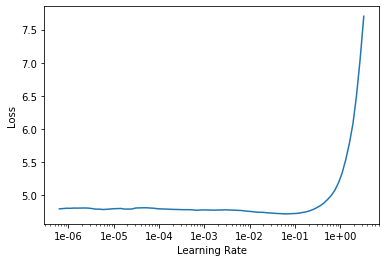

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.5)
learn.fit_one_cycle(cyc_len=1, max_lr=1e-2, moms=(0.95, 0.85))

epoch,train_loss,valid_loss,accuracy,time
0,4.251603,4.017988,0.293578,05:40


In [0]:
learn.unfreeze()
learn.fit_one_cycle(cyc_len=10, max_lr=1e-2, moms=(0.95, 0.85))

epoch,train_loss,valid_loss,accuracy,time
0,4.001808,3.941348,0.301745,05:42
1,4.128095,4.060712,0.289842,05:42
2,4.214559,4.133401,0.282311,05:42
3,4.171031,4.105160,0.285697,05:43
4,4.107690,4.054721,0.290646,05:42
5,3.952753,3.991771,0.297385,05:43
6,3.815827,3.928691,0.304834,05:42
7,3.655516,3.889913,0.310102,05:42
8,3.498987,3.881652,0.312519,05:43
9,3.386326,3.888191,0.312559,05:42


In [0]:
# Save the fine-tuned encoder
learn.save_encoder('ft_enc')

In [0]:
# Classifier model data
data_clas = TextClasDataBunch.from_csv(path, 'train.csv', vocab=data_lm.train_ds.vocab,
                                       min_freq=1, bs=32)
data_clas.save()

In [0]:
learn = text_classifier_learner(data_clas, arch= AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')
learn.freeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


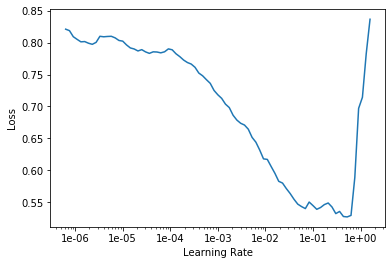

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, max_lr=1e-2, moms=(0.95, 0.85))

epoch,train_loss,valid_loss,accuracy,time
0,0.314346,0.229890,0.911200,04:21


In [0]:
learn.freeze_to(-2) 
learn.fit_one_cycle(1, slice(1e-3,1e-2), moms=(0.95,0.85))

epoch,train_loss,valid_loss,accuracy,time
0,0.304500,0.196820,0.920200,04:54


In [0]:
learn.freeze_to(-3) 
learn.fit_one_cycle(1, slice(8e-4,1e-2), moms=(0.95,0.85))

epoch,train_loss,valid_loss,accuracy,time
0,0.248752,0.181083,0.930800,04:23


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(8e-4,2e-2), moms=(0.95,0.85))

epoch,train_loss,valid_loss,accuracy,time
0,0.246294,0.183238,0.927400,04:22
1,0.210732,0.163227,0.933000,04:14
2,0.139298,0.155351,0.939800,04:04
3,0.089309,0.167842,0.944600,03:53


In [0]:
test = pd.read_csv(path/testfile, encoding='iso-8859-1')
test_pred = test.filter(['review','label'])
test_pred

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
...,...,...
9995,"A gritty Australian film, with all the element...",pos
9996,This movie gives you more of an idiea how Aust...,pos
9997,Before I start my review here is a quick lesso...,pos
9998,"A good story, well-acted with unexpected chara...",pos


In [0]:
test_pred['predicted label'] = test_pred['review'].apply(lambda row: str(learn.predict(row)[0]))
test_pred.head()

,review,label,predicted label
0,Once again Mr. Costner has dragged out a movie...,neg,neg
1,This is an example of why the majority of acti...,neg,neg
2,"First of all I hate those moronic rappers, who...",neg,neg
3,Not even the Beatles could write songs everyon...,neg,neg
4,Brass pictures (movies is not a fitting word f...,neg,pos


In [0]:
from sklearn.metrics import f1_score,accuracy_score
m1 = f1_score(test_pred['label'], test_pred['predicted label'], pos_label='pos')
m2 = accuracy_score(test_pred['label'], test_pred['predicted label'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

F1 score      : 0.9318844954220745
Accuracy score: 0.9323


We can see that by utilising LSTM network in ULMFit, the accuracy score improves significantly from 0.88 to 0.93. But then, there are still some rooms for improvement and problems do exist in LSTM network too.


---

## 2. SST2 dataset

In [0]:
from fastai import *
from fastai.text import *
from pathlib import Path
import pandas as pd
import numpy as np
import re

In [0]:
train = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', 
                      delimiter='\t', header=None)
train.columns=['review','label']
train

,review,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


In [0]:
def clean_ascii(text):
    # function to remove non-ASCII chars from data
    return ''.join(i for i in text if ord(i) < 128)
  
train['review'] = train['review'].apply(clean_ascii)
train.head()

,review,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [0]:
# Write train to csv
path = Path('/content/gdrive/My Drive/Dataset')
train.to_csv(path/'train2.csv')

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'train2.csv')

In [0]:
# Save the language and classifier model data for re-use
data_lm.save()

In [0]:
data_lm.show_batch()

idx,text
0,"all the hallmarks of a movie designed strictly for children 's home video , a market so xxunk it xxunk all manner of lame entertainment , as long as 3 year xxunk find it diverting xxbos a portrait of alienation so perfect , it will certainly succeed in xxunk most viewers xxbos the rules of attraction gets us too drunk on the party favors to sober us up with the"
1,"xxunk and most sordid of human behavior on the screen , then laughs at how clever it 's being xxbos fails in making this character xxunk , in getting under her skin , in exploring xxunk well before the end , the film grows as dull as its characters , about whose fate it is hard to care xxbos several uninteresting , xxunk people do bad things to and with"
2,"the film is not only a love song to the movies but it also is more fully an example of the kind of lush , all enveloping movie experience it xxunk xxbos neil burger here succeeded in making the mystery of four decades back the xxunk for a more immediate mystery in the present xxbos it 's about individual moments of mood , and an xxunk that 's actually sort"
3,of movies that flow through the hollywood xxunk without a xxunk xxbos it 's xxunk to american psycho but still has xxunk enough to get inside you and stay there for a couple of hours xxbos slap her she 's not funny ! xxbos you can tell almost immediately that welcome to collinwood is n't going to jell xxbos not many movies have that kind of impact on me these
4,"to say about growing up catholic or , really , anything xxbos watching this film , what we feel is n't mainly suspense or excitement xxbos this is more fascinating being real than anything seen on jerry xxunk xxbos the appeal of the vulgar , xxunk , xxunk humour went over my head or considering just how low brow it is perhaps it xxunk under my feet xxbos an invaluable"


In [0]:
learn = language_model_learner(data_lm, arch = AWD_LSTM, pretrained = True, drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


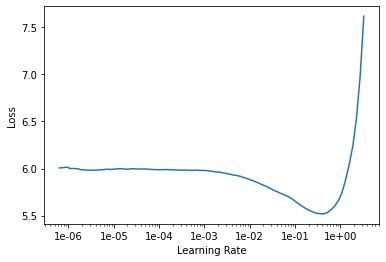

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.5)
learn.fit_one_cycle(cyc_len=1, max_lr=1e-2, moms=(0.95, 0.85))

epoch,train_loss,valid_loss,accuracy,time
0,5.503974,4.804791,0.210969,00:03


In [0]:
learn.unfreeze()
learn.fit_one_cycle(cyc_len=2, max_lr=1e-2, moms=(0.95, 0.85))

epoch,train_loss,valid_loss,accuracy,time
0,4.739492,4.384730,0.247226,00:03
1,4.239692,4.333302,0.257334,00:03


In [0]:
# Save the fine-tuned encoder
learn.save_encoder('ft_enc')

In [0]:
# Classifier model data
data_clas = TextClasDataBunch.from_csv(path, 'train2.csv', vocab=data_lm.train_ds.vocab, bs=32)
data_clas.save()

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
3394, 1037, 499, 6041, 5258...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [0]:
learn = text_classifier_learner(data_clas, arch= AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')
learn.freeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


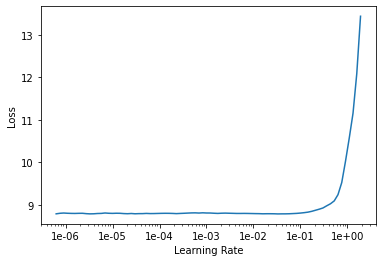

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, max_lr=1e-2, moms=(0.95, 0.85))

In [0]:
learn.freeze_to(-2) 
learn.fit_one_cycle(1, slice(1e-3,1e-2), moms=(0.95,0.85))

In [0]:
learn.freeze_to(-3) 
learn.fit_one_cycle(1, slice(8e-4,1e-2), moms=(0.95,0.85))

In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(8e-4,2e-2), moms=(0.95,0.85))

In [0]:
test_pred = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/test.tsv', 
                      delimiter='\t', header=None)
test_pred.columns=['review','label']
test_pred

,review,label
0,"no movement , no yuks , not much of anything",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films,1
...,...,...
1816,"an often deadly boring , strange reading of a ...",0
1817,the problem with concept films is that if the ...,0
1818,"safe conduct , however ambitious and well inte...",0
1819,"a film made with as little wit , interest , an...",0


In [0]:
test_pred['predicted label'] = test_pred['review'].apply(lambda row: int(learn.predict(row)[0]))
test_pred.head()

,review,label,predicted label
0,"no movement , no yuks , not much of anything",0,2967
1,"a gob of drivel so sickly sweet , even the eag...",0,1740
2,"gangs of new york is an unapologetic mess , wh...",0,659
3,"we never really feel involved with the story ,...",0,2961
4,this is one of polanski 's best films,1,3875


In [0]:
from sklearn.metrics import f1_score,accuracy_score
m1 = f1_score(test_pred['label'], test_pred['predicted label'], pos_label='pos')
m2 = accuracy_score(test_pred['label'], test_pred['predicted label'])
print('F1 score      :',m1)
print('Accuracy score:',m2)

## What is the problem with LSTM?



The same problem that happens to RNNs generally, happen with LSTMs, i.e. when sentences are way too long LSTMs still don’t do well. The reason for that is that the probability of keeping the context from a word that is far away from the current word being processed decreases exponentially with the distance from it.That means that when sentences are long, the model often forgets the content of distant positions in the sequence. 

Another problem with RNNs, and LSTMs, is that it’s hard to parallelize the work for processing sentences, since you are have to process word by word. This results in training the model takes longer time and can't perform multiple actions simultaneously. Not only that but there is no explicit model of long and short range dependencies. 

Moving on, we will look at **attention** and **Convolutional Neural Networks (CNN)** on how they address and solve the issues faced by LSTMs and introducing the latest state-of-the-art neural network, **Transformers**! 

Reference: https://towardsdatascience.com/the-fall-of-rnn-lstm-2d1594c74ce0
 

---


## What is attention?

When translating a sentence, I pay special attention to the word I’m presently translating. When I’m transcribing an audio recording, I listen carefully to the segment I’m actively writing down. These are the examples of usage of attention in different scenario.

Neural networks can achieve this same behavior using attention, focusing on part of a subset of the information they are given. For RNNs, instead of only encoding the whole sentence in a hidden state, each word has a corresponding hidden state that is passed all the way to the decoding stage. Then, the hidden states are used at each step of the RNN to decode. The following gif shows how that happens.

![alt text](https://miro.medium.com/max/750/1*JrxKsw2LYU9emkM-jR13uQ.gif)

The idea behind it is that there might be relevant information in every word in a sentence. So in order for the decoding to be precise, it needs to take into account every word of the input, using attention.

However, processing inputs (words) in parallel is still not possible. For a large corpus of text, this increases the time spent on processing the text. As result, Convolutional Neural Network is introduced to address this issue.


---


## Why Convolutional Neural Network (CNN)?

CNN enables parallelisation and thus greatly reduce the time spent in processing the inputs. Some of the most popular neural networks for sequence transduction, Wavenet and Bytenet, are CNN.

![alt text](https://miro.medium.com/max/713/1*www46FWqJCc3OZQKP_QRoQ.gif)

The reason why Convolutional Neural Networks can work in parallel, is that each word on the input can be processed at the same time and does not necessarily depend on the previous words to be translated. 

However, the problem is that CNN do not necessarily help with the problem of figuring out the problem of dependencies when translating sentences. That’s why **Transformers** were created, they are a combination of both CNN with attention.


---




















# Transformers


Transformers try to solve the problems faced by LSTM by introducing CNN (for parallelisation purpose) together with attention models. Attention boosts the speed of how fast the model can translate from one sequence to another, more specifically, it uses self-attention (to be even more specific, it uses multihead attention). 

![alt text](https://miro.medium.com/max/1523/1*V2435M1u0tiSOz4nRBfl4g.png)

The Transformer consists of six encoders and six decoders. Each encoder and decoder are similar to other encoder and decoder.

## The Encoder Side

Encoder consists of two layers: Self-attention and a Feed Forward Neural Network.

![alt text](https://miro.medium.com/max/990/1*HaGTuYfNHWg45GZbTBnVSA.png)
![alt text](https://miro.medium.com/max/509/1*QcTbVCVPj4WFnqvvWU5-hQ.png)

The encoder’s inputs first flow through a self-attention layer. It helps the encoder look at other words in the input sentence as it encodes a specific word. The decoder has both those layers, but between them is an encoder-decoder attention layer that helps the decoder focus on relevant parts of the input sentence.







## What is Self- Attention?

Self-attention is similar to attention, they fundamentally share the same concept and many common mathematical operations.  In layman’s terms, the self-attention mechanism allows the inputs to interact with each other (“self”) and find out who they should pay more attention to (“attention”). The outputs are aggregates of these interactions and attention scores. Here is how it looks like in a sentence:

![alt text](https://miro.medium.com/max/1580/1*GQzYZuAMWr3lN_IACBfvAA.png)


---

## How Self Attention works?

As is the case in NLP applications in general, we begin by turning each input word into a vector using an embedding algorithm. 

Each word is embedded into a vector of size 512. We’ll represent those vectors with these simple boxes.

![alt text](https://miro.medium.com/max/1030/0*0oTRj6MKAYEs_cT1.png)

In the bottom encoder that would be the word embeddings, but in other encoders, it would be the output of the encoder that’s directly below. After embedding the words in our input sequence, each of them flows through each of the two layers of the encoder. One key property of the Transformer, which is that the word in each position flows through its own path in the encoder. There are dependencies between these paths in the self-attention layer. The feed-forward layer does not have those dependencies, however, and thus the various paths can be executed in parallel while flowing through the feed-forward layer.

![alt text](https://miro.medium.com/max/1353/0*FVCP6TqLPQeWPZqt.png)


---



## Steps in calculating self-attention:

![alt text](https://miro.medium.com/max/1094/0*-P9BdUe2FCSAIpxC.png)

1. Create three vectors from each of the encoder’s input vectors which are Query vector, Key vector and Value vector. These vectors are created by multiplying the embedding by three matrices that we trained during the training process.


2. Calculate a score to determine how much focus to place on other parts of the input sentence as we encode a word at a certain position. Score is calculated by taking the dot product of the query vector with the key vector of the respective word we’re scoring. So if we’re processing the self-attention for the word in position #1, the first score would be the dot product of q1 and k1. The second score would be the dot product of q1 and k2.

![alt text](https://miro.medium.com/max/856/0*KlFsyIDK3O54l14X.png)


3.  Divide the scores by 8 (the square root of the dimension of the key vectors used here — 64. This leads to having more stable gradients. There could be other possible values here, but this is the default).


4. Pass the result through a softmax operation. Softmax normalizes the scores so they’re all positive and add up to 1. Softmax score determines how much how much each word will be expressed at this position. Clearly the word at this position will have the highest softmax score, but sometimes it’s useful to attend to another word that is relevant to the current word.

![alt text](https://miro.medium.com/max/1084/0*rqWSBLDcJcbMmGs2.png)


5. Multiply each value vector by the softmax score. The intuition here is to keep intact the values of the word(s) we want to focus on, and drown-out irrelevant words (by multiplying them by tiny numbers like 0.001, for example).


6. Sum up the weighted value vectors. This produces the output of the self-attention layer at this position (for the first word). The resulting vector is one we can send along to the feed-forward neural network.

![alt text](https://miro.medium.com/max/983/0*ih2c_llIiOD1-aJN.png)

In the actual implementation, however, this calculation is done in matrix form for faster processing.







## Multihead attention



To make transformer even better, Transformers use the concept of Multihead attention. It expands the model’s ability to focus on different positions.  Yes, in the example above, z1 contains a little bit of every other encoding, but it could be dominated by the the actual word itself. It would be useful if we’re translating a sentence like “The animal didn’t cross the street because it was too tired”, we would want to know which word “it” refers to.

The idea behind it is that whenever you are translating a word, you may pay different attention to each word based on the type of question that you are asking. The images below show what that means. For example, whenever you are translating “kicked” in the sentence “I kicked the ball”, you may ask “Who kicked”. Depending on the answer, the translation of the word to another language can change. Or ask other questions, like “Did what?”

![alt text](https://miro.medium.com/max/1540/1*8H6TqcfHrtNCc9_Qva7xog.png)


## All-in-one visual showing how multihad attention works:


![alt text](http://jalammar.github.io/images/t/transformer_multi-headed_self-attention-recap.png)







## Positional Encoding

Another important step on the Transformer is to add positional encoding when encoding each word. Positional encoders are vector that gives context based on position of word in sentence. These vectors follow a specific pattern that the model learns, which helps it determine the position of each word, or the distance between different words in the sequence. The intuition here is that adding these values to the embeddings provides meaningful distances between the embedding vectors once they’re projected into Q/K/V vectors and during dot-product attention.

![alt text](http://jalammar.github.io/images/t/transformer_positional_encoding_vectors.png)

## Residual Connection and Layer Normalization

Each sub-layer (self-attention, ffnn) in each encoder is followed by a layer-normalization step and has a residual connection around it.

![alt text](http://jalammar.github.io/images/t/transformer_resideual_layer_norm.png)

Normalization helps with the problem called internal covariate shift. Internal covariate shift refers to covariate shift occurring within a neural network, i.e. going from (say) layer 2 to layer 3. This happens because, as the network learns and the weights are updated, the distribution of outputs of a specific layer in the network changes. This forces the higher layers to adapt to that drift, which slows down learning. After normalizing the input in the neural network, we don’t have to worry about the scale of input features being extremely different.

To understand layer normalization, it is useful to contrast it with batch normalization. A mini-batch consists of multiple examples with the same number of features. Mini-batches are matrices — or tensors if each input is multi-dimensional — where one axis corresponds to the batch and the other axis — or axes — correspond to the feature dimensions. Batch normalization normalizes the input features across the batch dimension. The key feature of layer normalization is that it normalizes the inputs across the features. In batch normalization, the statistics are computed across the batch and are the same for each example in the batch. In contrast, in layer normalization, the statistics are computed across each feature and are independent of other examples. Layer normalization is better for the purpose of stabilization.

![alt text](https://miro.medium.com/max/1280/1*hex7_me89ax78PCv2zLTzA.png)

Besides, skip connections or residual connections are used to allow gradients to flow through a network directly, without passing through non-linear activation functions. Non-linear activation functions (eg: sigmoid and tanh), by nature of being non-linear, cause the gradients to explode or vanish (depending on the weights). Skip connections form conceptually a ‘bus’ which flows right the way through the network, and in reverse, the gradients can flow backwards along it too.

If we’re to visualize the vectors and the layer-norm operation associated with self attention, it would look like this:

![alt text](http://jalammar.github.io/images/t/transformer_resideual_layer_norm_2.png)





## The Decoder Side

Now that we’ve covered most of the concepts on the encoder side, we basically know how the components of decoders work as well. But let’s take a look at how they work together.

![alt text](https://miro.medium.com/max/509/1*QcTbVCVPj4WFnqvvWU5-hQ.png)

The encoder start by processing the input sequence. The output of the top encoder is then transformed into a set of attention vectors K and V. These are to be used by each decoder in its “encoder-decoder attention” layer which helps the decoder focus on appropriate places in the input sequence:

![alt text](http://jalammar.github.io/images/t/transformer_decoding_1.gif)

The following steps repeat the process until a special symbol is reached indicating the transformer decoder has completed its output. The output of each step is fed to the bottom decoder in the next time step, and the decoders bubble up their decoding results just like the encoders did. And just like we did with the encoder inputs, we embed and add positional encoding to those decoder inputs to indicate the position of each word.

![alt text](http://jalammar.github.io/images/t/transformer_decoding_2.gif)

The self attention layers in the decoder operate in a slightly different way than the one in the encoder:

There is a masked multi-head attention at the bottom. Masked represents a mask that masks certain values so that they do not have an effect when the parameters are updated. There are two kinds of masks in the Transformer model — padding mask and sequence mask. The padding mask is used in all the scaled dot-product attention (query.key), and the sequence mask is only used in the decoder’s self-attention.

A padding mask solves the problem of input sequences being of variable length. Specifically, we pad 0 after a shorter sequence. But if the input sequence is too long, the content on the left is intercepted and the excess is discarded directly. Because the location of these fills (zeroes) is actually meaningless, our attention mechanism should not focus on these locations, so we need to do some processing. The specific approach is to add a very large negative number (negative infinity) to the values of these positions, so that the probability of these positions will be close to 0 after softmax! The padding mask is actually a tensor, each value is a Boolean, and the value of False is where we want to process.

A sequence mask is designed to ensure that the decoder is unable to see future information. That is, for a sequence, at time_step t, our decoded output should only depend on the output before t, not the output after t. This is specific to the Transformer architecture because we do not have RNNs where we can input our sequence sequentially. Here, we input everything together and if there were no mask, the multi-head attention would consider the whole decoder input sequence at each position. We achieve this by generating an upper triangular matrix with the values of the upper triangles all zero and applying this matrix to each sequence.

The “Encoder-Decoder Attention” layer works just like multiheaded self-attention, except it creates its Queries matrix from the layer below it, and takes the Keys and Values matrix from the output of the encoder stack

Another detail is that the the decoder input will be shifted to the right by one position. One reason to do this is that we do not want our model to learn how to copy our decoder input during training, but we want to learn that given the encoder sequence and a particular decoder sequence, which has been already seen by the model, we predict the next word/character. If we don’t shift the decoder sequence, the model learns to simply ‘copy’ the decoder input, since the target word/character for position i would be the word/character i in the decoder input. Thus, by shifting the decoder input by one position, our model needs to predict the target word/character for position i having only seen the word/characters 1, …, i-1 in the decoder sequence. This prevents our model from learning the copy/paste task. We fill the first position of the decoder input with a start-of-sentence token, since that place would otherwise be empty because of the right-shift. Similarly, we append an end-of-sentence token to the decoder input sequence to mark the end of that sequence and it is also appended to the target output sentence.







## The Final Linear and Softmax Layer

The decoder stack outputs a vector of floats. How do we turn that into a word? That’s the job of the final Linear layer which is followed by a Softmax Layer.

The Linear layer is a simple fully connected neural network that projects the vector produced by the stack of decoders, into a much, much larger vector called a logits vector.

Let’s assume that our model knows 10,000 unique English words (our model’s “output vocabulary”) that it’s learned from its training dataset. This would make the logits vector 10,000 cells wide – each cell corresponding to the score of a unique word. That is how we interpret the output of the model followed by the Linear layer.

The softmax layer then turns those scores into probabilities (all positive, all add up to 1.0). The cell with the highest probability is chosen, and the word associated with it is produced as the output for this time step.

![alt text](http://jalammar.github.io/images/t/transformer_decoder_output_softmax.png)



## The model architecture of Transformer

Thus, after going through all the components in details, here is how a transformer looks like:

![alt_text](https://miro.medium.com/max/1800/1*BHzGVskWGS_3jEcYYi6miQ.png)

## Recap of Training

Now that we’ve covered the entire forward-pass process through a trained Transformer, it would be useful to glance at the intuition of training the model.

During training, an untrained model would go through the exact same forward pass. But since we are training it on a labeled training dataset, we can compare its output with the actual correct output.

To visualize this, let’s assume our output vocabulary only contains six words(“a”, “am”, “i”, “thanks”, “student”, and “<eos>” (short for ‘end of sentence’)).
    
![alt text](http://jalammar.github.io/images/t/vocabulary.png)

Once we define our output vocabulary, we can use a vector of the same width to indicate each word in our vocabulary. This also known as one-hot encoding. So for example, we can indicate the word “am” using the following vector:

![alt_text](http://jalammar.github.io/images/t/one-hot-vocabulary-example.png)

Following this recap, let’s discuss the model’s loss function – the metric we are optimizing during the training phase to lead up to a trained and hopefully amazingly accurate model.


---


## The Loss Function

Say we are training our model. Say it’s our first step in the training phase, and we’re training it on a simple example – translating “merci” into “thanks”.

What this means, is that we want the output to be a probability distribution indicating the word “thanks”. But since this model is not yet trained, that’s unlikely to happen just yet.

![alt_text](http://jalammar.github.io/images/t/transformer_logits_output_and_label.png)

Since the model's parameters (weights) are all initialized randomly, the (untrained) model produces a probability distribution with arbitrary values for each cell/word. We can compare it with the actual output, then tweak all the model's weights using backpropagation to make the output closer to the desired output.

But note that this is an oversimplified example. More realistically, we’ll use a sentence longer than one word. For example – input: “je suis étudiant” and expected output: “i am a student”. What this really means, is that we want our model to successively output probability distributions where:

a. Each probability distribution is represented by a vector of width vocab_size (6 in our toy example, but more realistically a number like 3,000 or 10,000)

b. The first probability distribution has the highest probability at the cell associated with the word “i”

c. The second probability distribution has the highest probability at the cell associated with the word “am”

d. And so on, until the fifth output distribution indicates ‘<end of sentence>’ symbol, which also has a cell associated with it from the 10,000 element vocabulary.

![alt text](http://jalammar.github.io/images/t/output_target_probability_distributions.png)

After training the model for enough time on a large enough dataset, we would hope the produced probability distributions would look like this:

![alt text](http://jalammar.github.io/images/t/output_trained_model_probability_distributions.png)

Now, because the model produces the outputs one at a time, we can assume that the model is selecting the word with the highest probability from that probability distribution and throwing away the rest. That’s one way to do it (called greedy decoding). 

Another way to do it would be to hold on to, say, the top two words with highest probabilities (say, ‘I’ and ‘a’ for example), then in the next step, run the model twice: once assuming the first output position was the word ‘I’, and another time assuming the first output position was the word ‘a’, and whichever version produced less error considering both positions #1 and #2 is kept. We repeat this for positions #2 and #3…etc. This method is called “beam search”, where in our example, beam_size was two (because we compared the results after calculating the beams for positions #1 and #2), and top_beams is also two (since we kept two words). These are both hyperparameters that you can experiment with.




Reference: 

1. https://towardsdatascience.com/transformers-141e32e69591


2. http://jalammar.github.io/illustrated-transformer/


3. http://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/


4. https://towardsdatascience.com/breaking-bert-down-430461f60efb



# 2. Bidirectional Encoder Representations from Transformers (BERT)

BERT’s key technical innovation is applying the bidirectional training of Transformer, a popular attention model, to language modelling. A language model which is bidirectionally trained can have a deeper sense of language context and flow than single-direction language models.

## General Idea of BERT

1. Language modeling is an effective task for using unlabeled data to pretrain neural networks in NLP


2. Traditional language models take the previous n tokens and predict the next one. In contrast, BERT trains a language model that takes both the previous and next tokens into account when predicting.


3. BERT is also trained on a next sentence prediction task to better handle tasks that require reasoning about the relationship between two sentences (e.g. question answering)


4. BERT uses the Transformer architecture for encoding sentences.



There is one of the key traits of BERT: Instead of predicting the next word after a sequence of words, BERT randomly masks words in the sentence and predicts them.

![alt text](https://i0.wp.com/mlexplained.com/wp-content/uploads/2019/01/Screen-Shot-2019-01-03-at-11.22.11-AM.png?resize=1024%2C262)
Differences in the Language Model Architecture between major transfer learning methods


Why is this method effective? Because this method forces the model to learn how to use information from the entire sentence in deducing what words are missing.

If you are familiar with the NLP literature, you might know about bidirectional LSTM based language models and wonder why they are insufficient. Bidirectional LSTM based language models train a standard left-to-right language model and also train a right-to-left (reverse) language model that predicts previous words from subsequent words. Actually, this is what methods like ELMo and ULMFiT did. In ELMo, there is a single LSTM for the forward language model and backward language model each. The crucial difference is this: neither LSTM takes both the previous and subsequent tokens into account at the same time.

![alt_text](https://i0.wp.com/mlexplained.com/wp-content/uploads/2019/01/Screen-Shot-2019-01-03-at-4.40.22-PM.png?resize=1024%2C207)

This is crucial since this forces the model to use information from the entire sentence simulatenously - regardless of the position - to make a good predictions.

## How BERT is built?

BERT is basically a trained Transformer Encoder stack. BERT makes use of Transformer, an attention mechanism that learns contextual relations between words (or sub-words) in a text. In its vanilla form,Transformer includes two separate mechanisms — an encoder that reads the text input and a decoder that produces a prediction for the task. Since BERT’s goal is to generate a language model, only the encoder mechanism is necessary. The Transformer architecture is a model that does not use recurrent connections at all and uses attention over the sequence instead.

As opposed to directional models, which read the text input sequentially (left-to-right or right-to-left), the Transformer encoder reads the entire sequence of words at once. Therefore it is considered bidirectional, though it would be more accurate to say that it’s non-directional. This characteristic allows the model to learn the context of a word based on all of its surroundings (left and right of the word).

As input, BERT takes token embeddings as well as a couple of additional embeddings that provide some crucial metadata. One of these embeddings is the positional embedding. One limitation of the Transformer architecture is that - unlike RNNs - it cannot take the order of the inputs into account (i.e. it will treat the first and last tokens of the inputs exactly the same if they are the same word). To overcome this problem, BERT learns and uses positional embeddings to express the position of words in a sentence. These embeddings are added to the token embeddings before feeding them into the model.

BERT also takes segment embeddings as input. BERT can be trained on sentence pairs for tasks that take sentence pairs as input (e.g. question answering and natural language inference). It learns a unique embedding for the first and second sentences to help the model distinguish between the sentences.

The input schema for BERT is summarized below:
![alt text](https://miro.medium.com/max/1468/0*m_kXt3uqZH9e7H4w.png)

1. Token embedding is the task of get the embedding (i.e. a vector of real numbers) for each word in the sequence. Each word of the sequence is mapped to a emb_dim dimensional vector that the model will learn during training. You can think about it as a vector look-up for each token. The elements of those vectors are treated as model parameters and are optimized with back-propagation just like any other weights.


2. Positional Embedding is designed to help the model learn some notion of sequences and relative positioning of tokens. This is crucial for language-based tasks especially here because we are not making use of any traditional recurrent units such as RNN, GRU or LSTM Intuitively, we aim to be able to modify the represented meaning of a specific word depending on its position. We don’t want to change the full representation of the word but we want to modify it a little to encode its position by adding numbers between [-1,1] using predetermined (non-learned) sinusoidal functions to the token embeddings. For the rest of the Encoder, the word will be represented slightly differently depending on the position the word is in (even if it is the same word).

![alt text](https://miro.medium.com/max/2233/1*OsmkGAkon5IDTwZJ1ORwPA.png)


## How does it looks like?

![alt text](https://miro.medium.com/max/1375/1*9DD12JPwj1pLY6yUEOv35A.png)

![alt text](https://miro.medium.com/max/1375/1*Y1MDr4WgzYp4eZaBOuJIYw.png)


To overcome the challenge of bidirectional in which it allows each word to indirectly see itself in a multi-layered context, BERT uses two training strategies:

### 1. Masked Language Model (MLM) Training
    
Language Modeling is the task of predicting the next word given a sequence of words. In masked language modeling instead of predicting every next token, a percentage of input tokens is masked at random and only those masked tokens are predicted.
    
Why? Bi-directional models are more powerful than uni-directional language models. But in a multi-layered model bi-directional models do not work because the lower layers leak information and allow a token to see itself in later layers.
    
   The masked words are not always replaced with the masked token – [MASK] because then the masked tokens would never be seen before fine-tuning. Therefore, 15% of the tokens are chosen at random and 

1. 80% of the time tokens are actually replaced with the token [MASK].


2. 10% of the time tokens are replaced with a random token.


3. 10% of the time tokens are left unchanged. 
    
The model then attempts to predict the original value of the masked words, based on the context provided by the other, non-masked, words in the sequence. In technical terms, the prediction of the output words requires:

   1. Adding a classification layer on top of the encoder output.
    
    
   2. Multiplying the output vectors by the embedding matrix, transforming them into the vocabulary dimension.
   
   
   3. Calculating the probability of each word in the vocabulary with softmax.

![alt text](https://miro.medium.com/max/1095/0*ViwaI3Vvbnd-CJSQ.png)

### 2. Next Sentence Prediction (NSP) Training

In addition to masked language modeling, BERT also uses a next sentence prediction task to pretrain the model for tasks that require an understanding of the relationship between two sentences. This task can be easily generated from any monolingual corpus. It is helpful because many downstream tasks such as Question and Answering and Natural Language Inference require an understanding of the relationship between two sentences.

When taking two sentences as input, BERT separates the sentences with a special [SEP] token. During training, BERT is fed two sentences and 50% of the time the second sentence comes after the first one and 50% of the time it is a randomly sampled sentence. BERT is then required to predict whether the second sentence is random or not.

![alt text](https://i2.wp.com/mlexplained.com/wp-content/uploads/2019/01/Screen-Shot-2019-01-05-at-5.21.26-PM.png?w=634)
Example inputs for the next sentence prediction task


To predict if the second sentence is indeed connected to the first, the following steps are performed:

1. The entire input sequence goes through the Transformer model.


2. The output of the [CLS] token is transformed into a 2×1 shaped vector, using a simple classification layer (learned matrices of weights and biases).


3. Calculating the probability of IsNextSequence with softmax.

When training the BERT model, Masked LM and Next Sentence Prediction are trained together, with the goal of minimizing the combined loss function of the two strategies.

## Facts about BERT

1. WHAT IS THE MAXIMUM SEQUENCE LENGTH OF THE INPUT?

    512 tokens.


2. HOW MANY LAYERS ARE FROZEN IN THE FINE-TUNING STEP?
    
    No layers are frozen during fine-tuning. All the pre-trained layers along with the task-specific parameters are trained simultaneously.


3. IS DISCRIMINATIVE FINE-TUNING USED?
    
    No. All the parameters are tuned with the same learning rate.


4. WHAT ARE THE OPTIMAL VALUES OF THE HYPERPARAMETERS USED IN FINE-TUNING?

    The optimal hyperparameter values are task-specific. But, the authors found that the following range of values works well across all tasks –

    Dropout – 0.1
    Batch Size – 16, 32
    Learning Rate (Adam) – 5e-5, 3e-5, 2e-5
    Number of epochs – 3, 4
    
    The authors also observed that large datasets (> 100k labeled samples) are less sensitive to hyperparameter choice than smaller datasets.
    

5. IS THE NEXT SENTENCE PREDICTION TASK NECESSARY?

   No. Unlike masked language modeling, the performance drops for only a subset of the tasks. Concretely, for natural language inference and question answering (the MNLI-m, QNLI, and SQuAD datasets), next sentence prediction seems to help a lot. For paraphrase detection (MRPC), the performance change is much smaller, and for sentiment analysis (SST-2) the results are virtually the same.
    

## Steps in utilising BERT for text classification problem

1. Tokenization

    a. Use the BERT tokenizer to first split the word into tokens. 
    
    b. add the special tokens needed for sentence classifications (these are [CLS] at the first position, and [SEP] at the end of the sentence). 

    c. Replace each token with its id from the embedding table which is a component we get with the trained model.

![alt text](http://jalammar.github.io/images/distilBERT/bert-distilbert-tokenization-2-token-ids.png)

2. Flow through the BERT model

    a. The output would be a vector for each input token. each vector is made up of 768 numbers (floats).

    b. We ignore all except the first vector (the one associated with the [CLS] token). The one vector we pass as the input to the logistic regression model. (p.s: BERT was trained using a next sentence prediction (NSP) objective using the [CLS] token as a sequence approximate. The user may use this token (the first token in a sequence built with special tokens) to get a sequence prediction rather than a token prediction. However, averaging over the sequence may yield better results than using the [CLS] token.)

![alt text](http://jalammar.github.io/images/distilBERT/bert-model-calssification-output-vector-cls.png)


## Why use [CLS] token?

The [CLS] token will be prepended to every input sentence. So, on the first layer, the representation of [CLS] is a function of the [CLS] token itself and all other tokens to the right. This pattern repeats until you reach the last transformer layer. I hope you can see that the [CLS] token would have multiple opportunities to look at an input sentence left and right since the token representations it depends on is looking at the sentences left and right. This means that the [CLS] token representation at the final layer can be considered a rich representation of the input sentence.

[CLS] token carries the sentence representation in sentence classification tasks because this is the token whose representation is finetuned to the task at hand. We don't pick any other token as the sentence representation because the same token have different representation depending on its location. For example, the representation for the word "the" in the "the cat in the hat" is different than in "I like the cat". We also don't pick the n-th token as the representation because it won't be handle cases where the input sentence's lengh is less than n.

So, to make things easy for us, let's just tack on a dummy token (which we will call [CLS]) to every input sentence. This way, we can be sure that we always have a token whose representation is simply a function of the other tokens in the input sentence and not its position.


## How to process the output of BERT?

The output for BERT looks like something as below:

![alt text](http://jalammar.github.io/images/distilBERT/bert-output-tensor.png)

For sentence classification, we’re only interested in BERT’s output for the [CLS] token, so we select that slice of the cube and discard everything else.  We slice that 3d tensor to get the 2d tensor .

![alt text](http://jalammar.github.io/images/distilBERT/bert-output-tensor-selection.png)

And now features is a 2d numpy array containing the sentence embeddings of all the sentences in our dataset. Each row corresponds to a sentence in our dataset, each column corresponds to the output of a hidden unit from the feed-forward neural network at the top transformer block of the Bert/DistilBERT model. Afterwards, we use this output to train Logistic Regression.

![alt text](http://jalammar.github.io/images/distilBERT/bert-output-cls-senteence-embeddings.png)


Reference:
1. https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270


2. http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/


3. https://huggingface.co/transformers/index.html


4. https://yashuseth.blog/2019/06/12/bert-explained-faqs-understand-bert-working/


5. http://mlexplained.com/2019/01/07/paper-dissected-bert-pre-training-of-deep-bidirectional-transformers-for-language-understanding-explained/


6. https://mccormickml.com/2019/07/22/BERT-fine-tuning/

## Basic BERT

In [0]:
!pip install transformers
!pip install tensorflow==2.1.0

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [0]:
imdb_df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', 
                      delimiter='\t', header=None)
imdb_df.columns=['review','label']
imdb_df

,review,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


In [0]:
#BERT model:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [0]:
tokenized = imdb_df['review'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
tokenized

0       [101, 1037, 18385, 1010, 6057, 1998, 2633, 182...
1       [101, 4593, 2128, 27241, 23931, 2013, 1996, 62...
2       [101, 2027, 3653, 23545, 2037, 4378, 24185, 10...
3       [101, 2023, 2003, 1037, 17453, 14726, 19379, 1...
4       [101, 5655, 6262, 1005, 1055, 12075, 2571, 376...
                              ...                        
6915    [101, 9145, 1010, 7570, 18752, 14116, 1998, 28...
6916    [101, 2202, 2729, 2003, 19957, 2864, 2011, 103...
6917    [101, 1996, 5896, 4472, 4121, 1010, 3082, 7832...
6918    [101, 1037, 5667, 2919, 2143, 2007, 5667, 2561...
6919    [101, 1037, 12090, 2135, 2512, 5054, 19570, 23...
Name: review, Length: 6920, dtype: object

In [0]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
padded

array([[  101,  1037, 18385, ...,     0,     0,     0],
       [  101,  4593,  2128, ...,     0,     0,     0],
       [  101,  2027,  3653, ...,     0,     0,     0],
       ...,
       [  101,  1996,  5896, ...,     0,     0,     0],
       [  101,  1037,  5667, ...,     0,     0,     0],
       [  101,  1037, 12090, ...,     0,     0,     0]])

In [0]:
 tokenized.values

array([list([101, 1037, 18385, 1010, 6057, 1998, 2633, 18276, 2128, 16603, 1997, 5053, 1998, 1996, 6841, 1998, 5687, 5469, 3152, 102]),
       list([101, 4593, 2128, 27241, 23931, 2013, 1996, 6276, 2282, 2723, 1997, 2151, 2445, 12217, 7815, 102]),
       list([101, 2027, 3653, 23545, 2037, 4378, 24185, 1050, 1005, 1056, 4133, 2145, 2005, 1037, 11507, 10800, 1010, 2174, 14036, 2135, 3591, 1010, 2061, 2027, 19817, 4140, 2041, 1996, 7511, 2671, 4349, 3787, 1997, 11829, 7168, 9219, 1998, 28971, 2308, 1999, 8301, 8737, 2100, 4253, 102]),
       ...,
       list([101, 1996, 5896, 4472, 4121, 1010, 3082, 7832, 1999, 1037, 20857, 1010, 3302, 2100, 2126, 2008, 2515, 1050, 1005, 1056, 3749, 2151, 12369, 2046, 2339, 1010, 2005, 6013, 1010, 2204, 2477, 4148, 2000, 2919, 2111, 102]),
       list([101, 1037, 5667, 2919, 2143, 2007, 5667, 25618, 7961, 2011, 3213, 2472, 9679, 15536, 15810, 2012, 1996, 9000, 2504, 102]),
       list([101, 1037, 12090, 2135, 2512, 5054, 19570, 2389, 4038, 2055, 1037, 21

In [0]:
np.array(padded).shape

(6920, 67)

In [0]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(6920, 67)

In [0]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [0]:
features = last_hidden_states[0][:,0,:].numpy()
features

In [0]:
labels = imdb_df['label']
train_features, test_features, train_labels,  test_labels = train_test_split(features, labels)

In [0]:
# parameters = {'C': np.linspace(0.0001, 100, 20)}
# grid_search = GridSearchCV(LogisticRegression(), parameters)
# grid_search.fit(train_features, train_labels)

# print('best parameters: ', grid_search.best_params_)
# print('best scores: ', grid_search.best_score_)

In [0]:
lr = LogisticRegression()
lr.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr.score(test_features, test_labels)

0.8583815028901735

In [0]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [0]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


## Fine Tune BERT

In [0]:
!pip install transformers

     |████████████████████████████████| 573kB 4.5MB/s 
     |████████████████████████████████| 1.0MB 38.5MB/s 
     |████████████████████████████████| 870kB 34.2MB/s 
     |████████████████████████████████| 3.7MB 43.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=b8ebf487f562ba239c34e36e5374e38f1c4899b1ee94394b832a51f18147fe8e
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses


In [0]:
import pandas as pd

df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', 
                      delimiter='\t', header=None)
df.columns=['review','label']
df

,review,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


In [0]:
# Get the lists of sentences and their labels.
sentences = df.review.values
labels = df.label.values

In [0]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [0]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  67


In [0]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 70,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  a stirring , funny and finally transporting re imagining of beauty and the beast and 1930s horror films
Token IDs: tensor([  101,  1037, 18385,  1010,  6057,  1998,  2633, 18276,  2128, 16603,
         1997,  5053,  1998,  1996,  6841,  1998,  5687,  5469,  3152,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [0]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

6,228 training samples
  692 validation samples


In [0]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it here. For fine-tuning BERT on a specific task, 
# the authors recommend a batch size of 16 or 32.
batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [0]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [0]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [0]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting thetraining data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [0]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [0]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [0]:
import random
import numpy as np

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a backward pass. PyTorch doesn't do this 
        # automatically because accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments arge given and what flags are set. For our 
        # usage here, it returns the loss (because we provided labels) and the "logits"--the model outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can calculate the average loss at the end. `loss` is 
        # a Tensor containing a single value; the `.item()` function just returns the Python value from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during the forward pass, since this is only needed 
        # for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    390.    Elapsed: 0:00:07.
  Batch    80  of    390.    Elapsed: 0:00:13.
  Batch   120  of    390.    Elapsed: 0:00:20.
  Batch   160  of    390.    Elapsed: 0:00:26.
  Batch   200  of    390.    Elapsed: 0:00:32.
  Batch   240  of    390.    Elapsed: 0:00:39.
  Batch   280  of    390.    Elapsed: 0:00:45.
  Batch   320  of    390.    Elapsed: 0:00:51.
  Batch   360  of    390.    Elapsed: 0:00:58.

  Average training loss: 0.35
  Training epcoh took: 0:01:02

Running Validation...
  Accuracy: 0.91
  Validation Loss: 0.24
  Validation took: 0:00:02

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    390.    Elapsed: 0:00:07.
  Batch    80  of    390.    Elapsed: 0:00:13.
  Batch   120  of    390.    Elapsed: 0:00:19.
  Batch   160  of    390.    Elapsed: 0:00:26.
  Batch   200  of    390.    Elapsed: 0:00:32.
  Batch   240  of    390.    Elapsed: 0:00:38.
  Batch   280  of    390.    Elapsed: 0:00:45.
  Batch  

In [0]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.35,0.24,0.91,0:01:02,0:00:02
2,0.17,0.35,0.90,0:01:02,0:00:02
3,0.08,0.34,0.92,0:01:01,0:00:02
4,0.04,0.35,0.92,0:01:01,0:00:02


In [0]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df2 = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/test.tsv', 
                      delimiter='\t', header=None)
df2.columns=['review','label']

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df2.review.values
labels = df2.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 70,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 1,821



In [0]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 1,821 test sentences...
    DONE.


In [0]:
from sklearn.metrics import accuracy_score

accuracy_set = []

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" and one column for "1"). Pick the label with 
  # the highest value and turn this in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  accuracy = accuracy_score(true_labels[i], pred_labels_i)                
  accuracy_set.append(accuracy)

acc = accuracy_score(true_labels[i], pred_labels_i)

print('Accuracy score: %.3f' % acc)

Accuracy score: 0.931


## Transformer Pipelines






In transformers v2.3.0, **pipelines** provides a high-level, easy to use, API for doing inference over a variety of downstream-tasks, including:

1. Sentence Classification (Sentiment Analysis): Indicate if the overall sentence is either positive or negative. (Binary Classification task or Logitic Regression task)

2. Token Classification (Named Entity Recognition, Part-of-Speech tagging): For each sub-entities (tokens) in the input, assign them a label (Classification task).

3. Question-Answering: Provided a tuple (question, context) the model should find the span of text in content answering the question.

4. Mask-Filling: Suggests possible word(s) to fill the masked input with respect to the provided context.
5. Feature Extraction: Maps the input to a higher, multi-dimensional space learned from the data.

Pipelines encapsulate the overall process of every NLP process:

1. Tokenization: Split the initial input into multiple sub-entities with ... properties (i.e. tokens).

2. Inference: Maps every tokens into a more meaningful representation.

3. Decoding: Use the above representation to generate and/or extract the final output for the underlying task.


In [0]:
from transformers import pipeline
import pandas as pd

nlp = pipeline('sentiment-analysis')
nlp('This movie was kind of boring.')

[{'label': 'NEGATIVE', 'score': 0.99974006}]

# 3. XLNet

## What's Wrong with BERT?

BERT was already a revolutionary method with strong performance across multiple tasks, but it wasn't without its flaws. XLNet pointed out two major problems with BERT.

1. The [MASK] token used in training does not appear during fine-tuning

    BERT is trained to predict tokens replaced with the special [MASK] token. The problem is that the [MASK] token - which is at the center of training BERT - never appears when fine-tuning BERT on downstream tasks.

    This can cause a whole host of issues such as:

    What does BERT do for tokens that are not replaced with [MASK]?
    
    In most cases, BERT can simply copy non-masked tokens to the output. So would it really learn to produce meaningful representations for non-masked tokens?
    
    Of course, BERT still needs to accumulate information from all words in a sequence to denoise [MASK] tokens. But what happens if there are no [MASK] tokens in the input sentence?
    
    There are no clear answers to the above problems, but it's clear that the [MASK] token is a source of train-test skew that can cause problems during fine-tuning. The authors of BERT were aware of this issue and tried to circumvent these problems by replacing some tokens with random real tokens during training instead of replacing them with the [MASK] token. However, this only constituted 10% of the noise. When only 15% of the tokens are noised to begin with, this only amounts to 1.5% of all the tokens, so is a lackluster solution.


2. BERT generates predictions independently

    Another problem stems from the fact that BERT predicts masked tokens in parallel. Let's illustrate with an example: Suppose we have the following sentence.

         I went to [MASK] [MASK] and saw the [MASK] [MASK] [MASK].

    One possible way to fill this out is

        I went to New York and saw the Empire State building.

    Another way is

        I went to San Francisco and saw the Golden Gate bridge.

    However, the sentence

        I went to San Francisco and saw the Empire State building

    is not valid. Despite this, BERT predicts all masked positions in parallel, meaning that during training, it does not learn to handle dependencies between predicting simultaneously masked tokens. In other words, it does not learn dependencies between its own predictions. Since BERT is not actually used to unmask tokens, this is not directly a problem. The reason this can be a problem is that this reduces the number of dependencies BERT learns at once, making the learning signal weaker than it could be.

    Note that neither of these problems is present in traditional language models. Language models have no [MASK] token and generate all words in a specified order so it learns dependencies between all the words in a sentence.

## Permutation Language Modeling

Of course, despite its flaws, BERT has one major advantage over traditional language models: it captures bidirectional context. This bidirectionality was a crucial factor in BERT's success, so going back to traditional language modeling is simply not an option. The question then becomes: can we train a model to incorporate bidirectional context while avoiding the [MASK] token and parallel independent predictions?

The answer is yes: XLNet does this by introducing a variant of language modeling called "permutation language modeling". Permutation language models are trained to predict one token given preceding context like traditional language model, but instead of predicting the tokens in sequential order, it predicts tokens in some random order. To illustrate, let's take the following sentence as an example:

    I like cats more than dogs.

A traditional language model would predict the tokens in the order

    "I", "like", "cats", "more", "than", "dogs"

where each token uses all previous tokens as context.

![alt text](https://i1.wp.com/mlexplained.com/wp-content/uploads/2019/06/ezgif.com-gif-maker-1.gif?resize=447%2C170)

In permutation language modeling, the order of prediction is not necessarily left to right and is sampled randomly instead. For instance, it could be

    "cats", "than", "I", "more", "dogs", "like"

where "than" would be conditioned on seeing "cats", "I" would be conditioned on seeing "cats, than" and so on. The following animation demonstrates this.

![alt text](https://i0.wp.com/mlexplained.com/wp-content/uploads/2019/06/ezgif.com-gif-maker-2.gif?resize=421%2C158)

Notice how the model is forced to model bidirectional dependencies with permutation language modeling. In expectation, the model should learn to model the dependencies between all combinations of inputs in contrast to traditional language models that only learn dependencies in one direction.

The difference between permutation language modeling and BERT is best illustrated below.

![alt text](https://i0.wp.com/mlexplained.com/wp-content/uploads/2019/06/Screen-Shot-2019-06-22-at-5.38.12-PM.png?resize=1024%2C567&ssl=1)
The conceptual difference between BERT and XLNet. Transparent words are masked out so the model cannot rely on them. XLNet learns to predict the words in an arbitrary order but in an autoregressive, sequential manner (not necessarily left-to-right). BERT predicts all masked words simultaneously.

As a word of caution, in permutation language modeling, we are not changing the actual order of words in the input sentence. We are just changing the order in which we predict them. If you're used to thinking of language modeling in a sequential manner, this may be hard to grasp: how can we change the order in which we predict tokens while not changing the order in which we feed them to the model? Just remember that Transformers use masking to choose which inputs to feed into the model and use positional embeddings to provide positional information. This means that we can feed input tokens in an arbitrary order simply by adjusting the mask to cover the tokens we want to hide from the model. As long as we keep the positional embeddings consistent, the model will see the tokens "in the right order".

## The Transformer XL

Transformers were a game-changer in NLP due to their incredible performance and ease of training. However, they had a major drawback compared to RNNs: they had limited context.

Suppose you had a 50000-word long piece of text that you wanted to feed to a model. Feeding this into any model all at once would be infeasible given memory constraints. For an RNN you could work around this by simply chunking the text, then feeding the RNN one chunk at a time without resetting the hidden state between chunks. This works because the RNN is recurrent and as long as you keep the hidden state, the RNN can "remember" previous chunks, giving it a theoretically infinite memory.

For a Transformer, this is impossible because Transformers take fixed-length sequences as input have no notion of "memory". All its computations are stateless (this was actually one of the major selling points of the Transformer: no state means computation can be parallelized)  so there is an upper limit on the distance of relationships a vanilla Transformer can model.

50000 words might be a bit of a stretch, but there are plenty of scenarios where you would want to feed very long sequences to a model. Language modeling is a prime example of this. 

The Transformer XL is a simple extension of the Transformer that seeks to resolve this problem. The idea is simple: what if we added recurrence to the Transformer? Adding recurrence at the word level would just make it an RNN. But what if we added recurrence at a "segment" level. In other words, what if we added state between consecutive sequences of computations? The Transformer XL accomplishes this by caching the hidden states of the previous sequence and passing them as keys/values when processing the current sequence. For example, if we had the consecutive sentences

    "I went to the store. I bought some cookies."

we can feed "I went to the store." first, cache the outputs of the intermediate layers, then feed the sentence "I bought some cookies." and the cached outputs into the model.

This idea is great, but there is one flaw: position. In the Transformer, we handled position using positional embeddings. The first word in a sentence would have the "first position" embedding added to it, the second word would have the "second position" embedding added, and so on. But with recurrence, what happens to the positional embedding of the first word in the previous segment? If we're caching the Transformer outputs, what happens to the positional embedding of the first word in the current segment?

To address these issues, the Transformer XL introduces the notion of relative positional embeddings. Instead of having an embedding represent the absolute position of a word, the Transformer XL uses an embedding to encode the relative distance between words. This embedding is used while computing the attention score between any two words: in other words, the relative positional embedding enables the model to learn how to compute the attention score for words that are n  words before and after the current word.


## Using the Transformer XL

Aside from using permutation language modeling, XLNet improves upon BERT by using the Transformer XL as its base architecture. The Transformer XL showed state-of-the-art performance in language modeling, so was a natural choice for XLNet.

XLNet uses the two key ideas from Transformer XL: relative positional embeddings and the recurrence mechanism. The hidden states from the previous segment are cached and frozen while conducting the permutation language modeling for the current segment. Since all the words from the previous segment are used as input, there is no need to know the permutation order of the previous segment.

The authors found that using the Transformer XL improved performance over BERT, even in the absence of permutation language modeling. This shows that better language models can lead to better representations, and thus better performance across a multitude of tasks, motivating the necessity of research into language modeling.


Reference:

1. https://mlexplained.com/2019/06/30/paper-dissected-xlnet-generalized-autoregressive-pretraining-for-language-understanding-explained/


2. https://huggingface.co/transformers/model_doc/xlnet.html


3. https://mccormickml.com/2019/09/19/XLNet-fine-tuning/

## Basic XLNet

In [0]:
!pip install transformers
!pip install tensorflow==2.1.0

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [0]:
imdb_df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', 
                      delimiter='\t', header=None)
imdb_df.columns=['review','label']
imdb_df = imdb_df.head(2000)
imdb_df

,review,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
1995,too bland and fustily tasteful to be truly pru...,0
1996,it does n't work as either,0
1997,this one aims for the toilet and scores a dire...,0
1998,in the name of an allegedly inspiring and easi...,0


In [0]:
#XLNet model:
model_class, tokenizer_class, pretrained_weights = (ppb.XLNetModel, ppb.XLNetTokenizer, 'xlnet-base-cased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [0]:
tokenized = imdb_df['review'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
tokenized

0       [24, 16003, 17, 19, 5787, 21, 1381, 21469, 17,...
1       [3070, 17, 88, 10305, 8145, 66, 40, 18, 3821, ...
2       [63, 28863, 58, 2477, 17, 6362, 17, 180, 26, 4...
3       [52, 27, 24, 19849, 8665, 17, 2411, 10200, 31,...
4       [17, 2595, 597, 4759, 2133, 118, 17, 26, 23, 1...
                              ...                        
1995    [269, 25928, 21, 17, 4257, 11332, 111, 3736, 1...
1996       [36, 358, 17, 180, 26, 46, 154, 34, 725, 4, 3]
1997    [52, 65, 6471, 28, 18, 8976, 21, 5100, 24, 156...
1998    [25, 18, 304, 20, 48, 5168, 25, 7508, 56, 21, ...
1999    [18, 1432, 27, 422, 13535, 37, 24, 468, 3746, ...
Name: review, Length: 2000, dtype: object

In [0]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
padded

array([[   24, 16003,    17, ...,     0,     0,     0],
       [ 3070,    17,    88, ...,     0,     0,     0],
       [   63, 28863,    58, ...,     0,     0,     0],
       ...,
       [   52,    65,  6471, ...,     0,     0,     0],
       [   25,    18,   304, ...,     0,     0,     0],
       [   18,  1432,    27, ...,     0,     0,     0]])

In [0]:
input_ids = torch.tensor(padded)  

with torch.no_grad():
    last_hidden_states = model(input_ids)

In [0]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
padded

array([[   24, 16003,    17, ...,     0,     0,     0],
       [ 3070,    17,    88, ...,     0,     0,     0],
       [   63, 28863,    58, ...,     0,     0,     0],
       ...,
       [  545,   197,    65, ...,     0,     0,     0],
       [   18,   468,    27, ...,     0,     0,     0],
       [   28,   127,    20, ...,     0,     0,     0]])

In [0]:
attention_mask = np.where(padded != 0, 1, 0)

In [0]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [0]:
features = last_hidden_states[0][:,0,:].numpy()
features

array([[ 0.34125707,  2.3395584 , -1.4445125 , ..., -1.4342374 ,
        -1.7864078 ,  0.650553  ],
       [-2.0320308 , -0.9894735 ,  0.84645516, ..., -0.00756087,
        -0.7017949 , -0.27526903],
       [ 0.19869834,  1.1511657 , -1.9059381 , ..., -2.1064408 ,
         3.143326  ,  0.2760778 ],
       ...,
       [-0.8050524 , -1.3606195 ,  0.12521945, ..., -1.3168265 ,
         0.6666188 ,  1.0935333 ],
       [-2.7931774 ,  1.2391853 , -1.8684678 , ..., -0.39258152,
         1.5283482 ,  4.0816474 ],
       [-3.2236118 , -1.4749207 , -1.1230023 , ..., -3.2364156 ,
         2.1875968 ,  1.2608442 ]], dtype=float32)

In [0]:
labels = imdb_df['label']
train_features, test_features, train_labels,  test_labels = train_test_split(features, labels)

In [0]:
lr = LogisticRegression()
lr.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr.score(test_features, test_labels)

0.722

## Fine Tune XLNet

In [0]:
!pip install pytorch-transformers

     |████████████████████████████████| 184kB 5.0MB/s 


In [0]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


from pytorch_transformers import XLNetModel, XLNetTokenizer, XLNetForSequenceClassification
from pytorch_transformers import AdamW

from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [0]:
import pandas as pd

df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', 
                      delimiter='\t', header=None)
df.columns=['review','label']
df

,review,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


In [0]:
# Get the lists of sentences and their labels.
sentences = df.review.values
sentences = [sentence + " [SEP] [CLS]" for sentence in sentences]
labels = df.label.values

In [0]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

100%|██████████| 798011/798011 [00:00<00:00, 2533595.99B/s]


Tokenize the first sentence:
['▁a', '▁stirring', '▁', ',', '▁funny', '▁and', '▁finally', '▁transporting', '▁', 're', '▁im', 'agin', 'ing', '▁of', '▁beauty', '▁and', '▁the', '▁beast', '▁and', '▁1930', 's', '▁horror', '▁films', '▁[', 's', 'ep', ']', '▁[', 'cl', 's', ']']


In [0]:
# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway. 
MAX_LEN = 128

# Use the XLNet tokenizer to convert the tokens to their index numbers in the XLNet vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [0]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [0]:
# Use train_test_split to split our data into train and validation sets for training

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [0]:
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [0]:
# Select a batch size for training. For fine-tuning with XLNet, the authors recommend a batch size of 32, 48, or 128. We will use 32 here to avoid memory issues.
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [0]:
# Load XLNEtForSequenceClassification, the pretrained XLNet model with a single linear classification layer on top. 

model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=2)
model.cuda()
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

100%|██████████| 467042463/467042463 [00:14<00:00, 32233202.26B/s]


In [0]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = AdamW(optimizer_grouped_parameters,
                     lr=2e-5)

In [0]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [0]:
# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]
    logits = outputs[1]
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      logits = output[0]
    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 0.4924195027504212


Epoch:  25%|██▌       | 1/4 [01:52<05:37, 112.53s/it]

Validation Accuracy: 0.9295454545454546
Train loss: 0.22406736870224658


Epoch:  50%|█████     | 2/4 [03:45<03:45, 112.59s/it]

Validation Accuracy: 0.9389204545454546
Train loss: 0.1296544223259657


Epoch:  75%|███████▌  | 3/4 [05:37<01:52, 112.60s/it]

Validation Accuracy: 0.9375
Train loss: 0.08133496565696521


Epoch: 100%|██████████| 4/4 [07:30<00:00, 112.60s/it]

Validation Accuracy: 0.9417613636363636


In [0]:
df2 = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/test.tsv', 
                      delimiter='\t', header=None)
df2.columns=['review','label']

# Create sentence and label lists
sentences = df.review.values

# We need to add special tokens at the beginning and end of each sentence for XLNet to work properly
sentences = [sentence + " [SEP] [CLS]" for sentence in sentences]
labels = df.label.values

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]


MAX_LEN = 128
# Use the XLNet tokenizer to convert the tokens to their index numbers in the XLNet vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)
  
batch_size = 32  


prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)
# Prediction on test set

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
    # Forward pass, calculate logit predictions
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_set = []

for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  accuracy = accuracy_score(true_labels[i], pred_labels_i)                
  accuracy_set.append(accuracy)

acc = accuracy_score(true_labels[i], pred_labels_i)
print('Accuracy score: %.3f' % acc)

Accuracy score: 1.000


# Comparison between ULMFit, BERT and XLNet (Own Assessment)


1. Base neural network
  
  a. ULMFit - LSTM (variant of RNN, using recurrence mechanism)
  
  b. BERT - Transformer (using attention mechanism)
  
  c. XLNet - TransformerXL (using segment level recurrence mechanism)

  ![alt text](https://2.bp.blogspot.com/--MRVzjIXx5I/XFCm-nmEDcI/AAAAAAAADuM/HoS7BQOmvrQyk833pMVHlEbdq_s_mXT2QCLcBGAs/s640/GIF2.gif)



2. Maximum length of input

  a. ULMFit - no limit, but as the length of input getting longer, the training time increases significantly as LSTM process input one by one

  b. BERT - 512 tokens, if exceed, it will truncate the sequence to maximum length set, if fall short, it will pad the sequence to same length

  c. XLNet - does not have the limitation of sentence length like BERT - XLNet processes sentences of any length by treating them as segment and carries state across segment



3. Time consumed to train

  a. ULMFit - Longer than BERT and XLNet as LSTM using recurrence mechanism (one epoch around 6 minutes to train, with GPU in colab)

  b. BERT - faster then ULMFit due to parallelization (all inputs process at once), equally fast as XLNet (one epoch aound 1 minute to train, with GPU in colab)

  c. XLNet - equally fast as BERT, however might face with insufficent memory (RAM) issues when handling a large dataset (in normal Google Colab with GPU, can't process 25k movie reviews dataset)



4. Accuracy and community support

  a. ULMFit - same as BERT (accuracy score of 0.93) but have strong commmunity support from fastai which is well developed and documented

  b. BERT - same as ULMFit (accuracy score of 0.93) but less community support from huggingface which still in developing phase

  c. XLNet - better than BERT and XLNet (accuracy score of 1.00) but since it's rather new in the field, resources available is even less than BERT (tutorial and blogpost)
  
Reference for NLP progress:
http://nlpprogress.com/english/sentiment_analysis.html